In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import shap
from scipy.stats import ttest_rel
from scipy.spatial.distance import euclidean
from scipy.stats import shapiro
from sklearn.decomposition import PCA
import pingouin as pg
from sklearn.cluster import KMeans

In [2]:
penguins = pd.read_csv("penguins.csv")

# drop column rowid because it is redundant with index
penguins = penguins.drop(columns='rowid')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [4]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
null_data = penguins[penguins.isnull().any(axis=1)]
null_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [6]:
null_data.shape

(11, 8)

# they are 2 ways to deal with missing values
1. delete it
2. use statistic to replace it 


In [7]:
# find the stats value
mean_bill_length = penguins['bill_length_mm'].mean()
median_bill_length = penguins['bill_length_mm'].median()
mode_bill_length = penguins['bill_length_mm'].mode()[0]

print("Mean for bill_length_mm is:", mean_bill_length)
print("Median for bill_length_mm is:", median_bill_length)
print("Mode for bill_length_mm is:", mode_bill_length)

Mean for bill_length_mm is: 43.9219298245614
Median for bill_length_mm is: 44.45
Mode for bill_length_mm is: 41.1


bill_length_mm

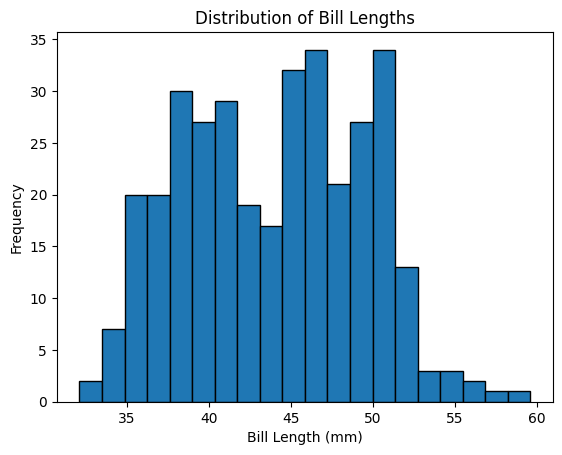

In [8]:
plt.figure()
plt.hist(penguins['bill_length_mm'], edgecolor='black', bins = 20)
plt.title('Distribution of Bill Lengths')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

approx normal

bill_depth_mm

In [9]:
mean_bill_depth = penguins['bill_depth_mm'].mean()
median_bill_depth = penguins['bill_depth_mm'].median()
mode_bill_depth = penguins['bill_depth_mm'].mode()[0]

print("Mean for bill_depth_mm is:", mean_bill_depth)
print("Median for bill_depth_mm is:", median_bill_depth)
print("Mode for bill_depth_mm is:", mode_bill_depth)

Mean for bill_depth_mm is: 17.151169590643274
Median for bill_depth_mm is: 17.3
Mode for bill_depth_mm is: 17.0


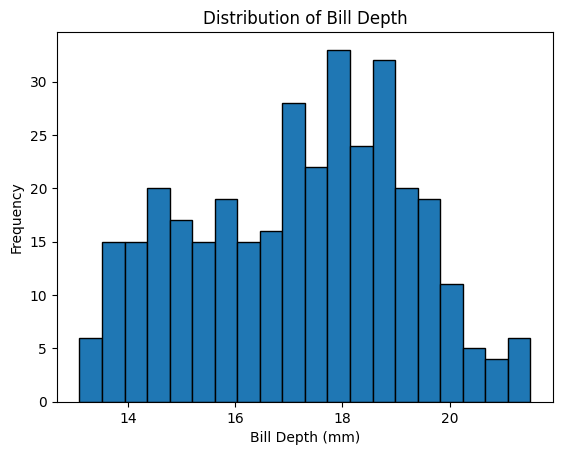

In [10]:
plt.figure()
plt.hist(penguins['bill_depth_mm'], edgecolor='black', bins=20)
plt.title('Distribution of Bill Depth')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.show()

approx normal

flipper_length_mm

In [11]:
mean_flipper_length = penguins['flipper_length_mm'].mean()
median_flipper_length = penguins['flipper_length_mm'].median()
mode_flipper_length = penguins['flipper_length_mm'].mode()[0]

print("Mean for flipper_length_mm is:", mean_flipper_length)
print("Median for flipper_length_mm is:", median_flipper_length)
print("Mode for flipper_length_mm is:", mode_flipper_length)

Mean for flipper_length_mm is: 200.91520467836258
Median for flipper_length_mm is: 197.0
Mode for flipper_length_mm is: 190.0


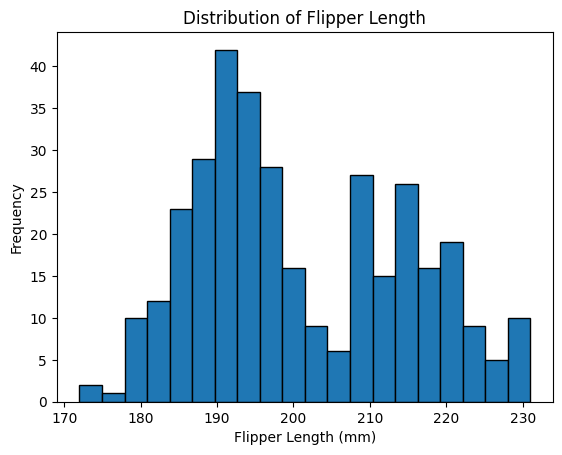

In [12]:
plt.figure()
plt.hist(penguins['flipper_length_mm'], edgecolor='black', bins=20)
plt.title('Distribution of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

right-skewed

body_mass_g

In [13]:
mean_body_mass = penguins['body_mass_g'].mean()
median_body_mass = penguins['body_mass_g'].median()
mode_body_mass = penguins['body_mass_g'].mode()[0]

print("Mean for body_mass_g is:", mean_body_mass)
print("Median for body_mass_g is:", median_body_mass)
print("Mode for body_mass_g is:", mode_body_mass)

Mean for body_mass_g is: 4201.754385964912
Median for body_mass_g is: 4050.0
Mode for body_mass_g is: 3800.0


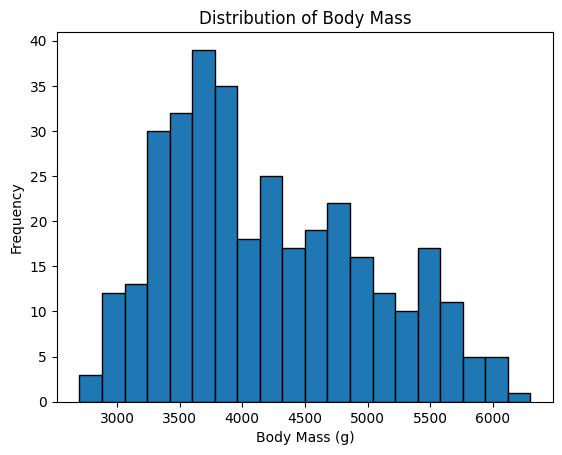

In [14]:
plt.figure()
plt.hist(penguins['body_mass_g'], edgecolor='black', bins=20)
plt.title('Distribution of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

right-skewed

bill_length_mm and bill_depth_mm are normal -> use Mean

flipper_length_mm and body_mass_g are right -> use Median

In [15]:
penguins['bill_length_mm'].fillna(mean_bill_length, inplace=True)
penguins['bill_depth_mm'].fillna(mean_bill_depth, inplace=True)



In [16]:
penguins['flipper_length_mm'].fillna(median_flipper_length, inplace=True)
penguins['body_mass_g'].fillna(median_body_mass, inplace=True)

In [17]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [18]:
penguins.groupby(['species', 'sex']).size()

species    sex   
Adelie     female    73
           male      73
Chinstrap  female    34
           male      34
Gentoo     female    58
           male      61
dtype: int64

In [19]:
null_data = penguins[penguins.isnull().any(axis=1)]
null_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,NaN,2007
8,Adelie,Torgersen,34.10000,18.10000,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.00000,20.20000,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.80000,17.10000,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.80000,17.30000,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.50000,18.90000,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.50000,14.30000,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.20000,14.40000,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.30000,13.80000,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.50000,15.70000,217.0,4875.0,NaN,2009


In [20]:
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
mean_each_species_sex = penguins.groupby(['species', 'sex'])[numeric_columns].mean()

mean_each_species_sex

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex                                                        
Adelie    female       37.257534      17.621918         187.794521   
          male         40.390411      19.072603         192.410959   
Chinstrap female       46.573529      17.588235         191.735294   
          male         51.094118      19.252941         199.911765   
Gentoo    female       45.563793      14.237931         212.706897   
          male         49.473770      15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    female  3368.835616  
          male    4043.493151  
Chinstrap female  3527.205882  
          male    3938.970588  
Gentoo    female  4679.741379  
          male    5484.836066

In [21]:
def calculate_distance(row, group_means):
    distances = {}
    for i, grouprow in group_means.iterrows():
       #print(f'index is {index} \n group_row is \n  {group_row}')
        sex = i
        distance = euclidean(row[numeric_columns], grouprow)
        distances[sex] = distance
    return distances



# replace missing values of sex
for i, row in penguins[penguins['sex'].isnull()].iterrows():
    print(f'index is {i} \n row is \n  {row}')
    species = row['species']
    #print(species)
    group_means = mean_each_species_sex.loc[species]
    print(group_means)
    distances = calculate_distance(row, group_means)
    print(distances)
    
    # female or male are close when consider distance?
    closest_sex = min(distances, key=distances.get)
    print(closest_sex)
    penguins.loc[i, 'sex'] = closest_sex

index is 3 
 row is 
  species                 Adelie
island               Torgersen
bill_length_mm        43.92193
bill_depth_mm         17.15117
flipper_length_mm        197.0
body_mass_g             4050.0
sex                        NaN
year                      2007
Name: 3, dtype: object
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
sex                                                                  
female       37.257534      17.621918         187.794521  3368.835616
male         40.390411      19.072603         192.410959  4043.493151
{'female': 681.2593441980524, 'male': 8.919748709109724}
male
index is 8 
 row is 
  species                 Adelie
island               Torgersen
bill_length_mm            34.1
bill_depth_mm             18.1
flipper_length_mm        193.0
body_mass_g             3475.0
sex                        NaN
year                      2007
Name: 8, dtype: object
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g


In [22]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,female,2007
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,male,2007
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.80000,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.50000,18.10000,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.60000,18.20000,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.80000,19.00000,210.0,4100.0,male,2009


In [23]:
penguins.groupby(['species', 'sex']).size()

species    sex   
Adelie     female    77
           male      75
Chinstrap  female    34
           male      34
Gentoo     female    63
           male      61
dtype: int64

In [24]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.892442,4200.872093,2008.029070
std,5.443643,1.969027,14.023826,799.696532,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.275000,15.600000,190.000000,3550.000000,2007.000000
50%,44.250000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [25]:
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [26]:
for col in penguins.select_dtypes(include='object').columns:
    print(penguins[col].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
female    174
male      170
Name: count, dtype: int64


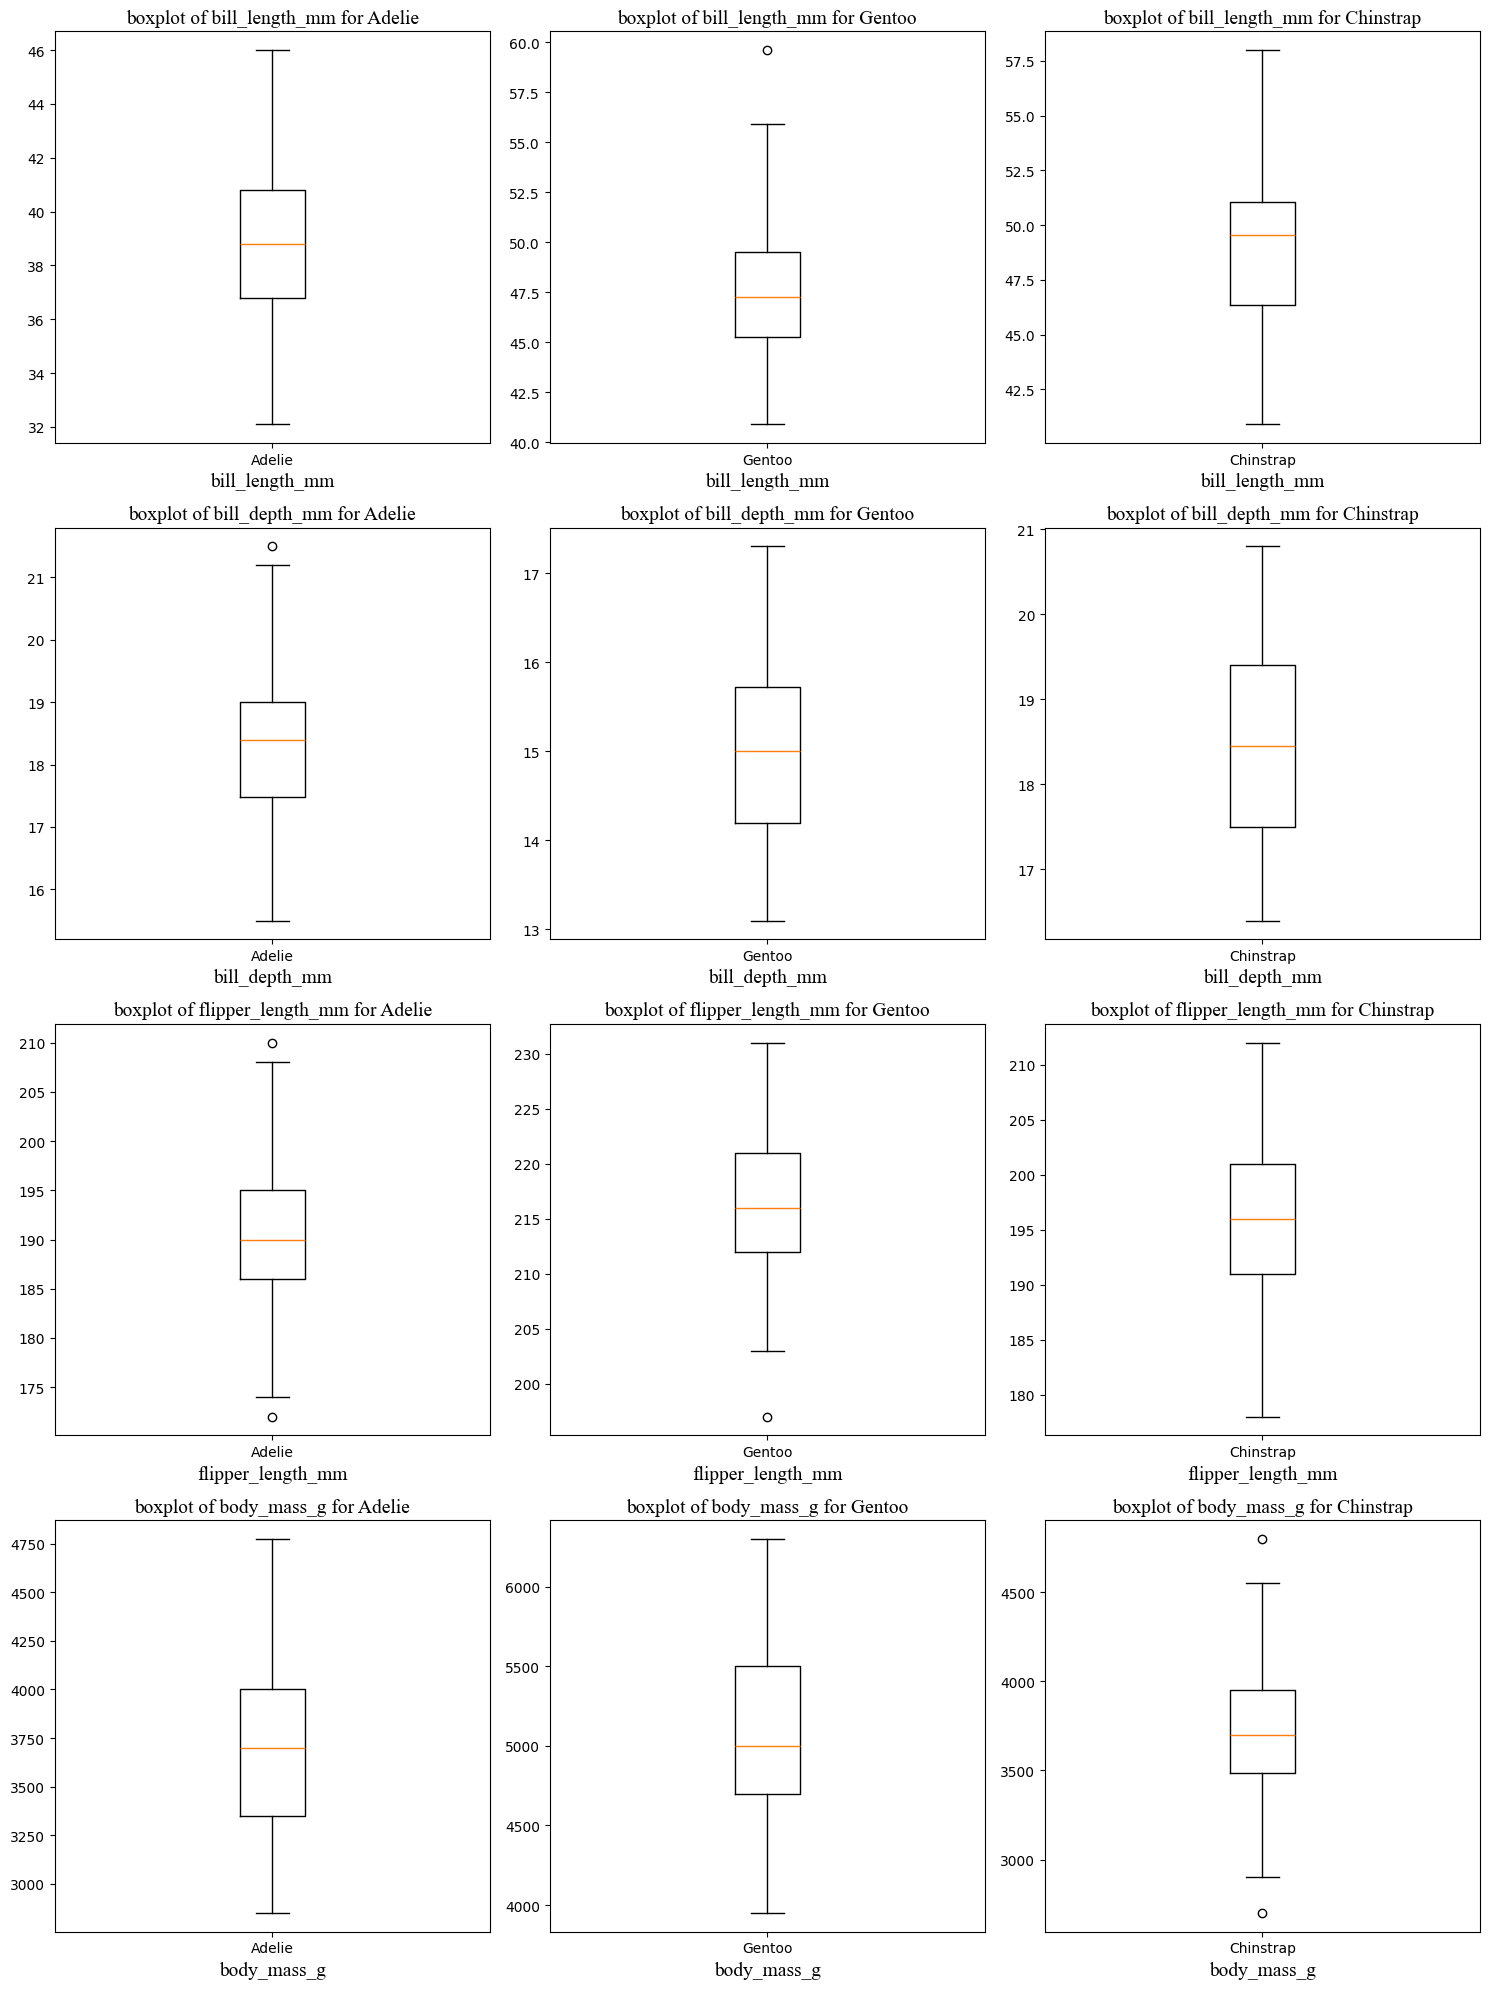

In [27]:
# graph for seeing outlier of each species
species = ['Adelie', 'Gentoo', 'Chinstrap']

numerical_column = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, ax = plt.subplots(4,3, figsize = (15,20))
for i, feature in enumerate(numerical_column):
    for j, specie in enumerate(species):
        type_penguins = penguins[penguins['species']== specie]
        ax[i, j].boxplot(type_penguins[feature], labels = [specie])
        ax[i, j].set_title(f"boxplot of {feature} for {specie}", fontdict={'family': 'Times New Roman', 'size': 14})
        ax[i, j].set_xlabel(f"{specie}", fontdict={'family': 'Times New Roman', 'size': 14})
        ax[i, j].set_xlabel(f"{feature}", fontdict={'family': 'Times New Roman', 'size': 14})
        
plt.tight_layout()
plt.show()


# delete outlier

In [28]:
adelie = penguins[penguins['species'] == 'Adelie']
gentoo = penguins[penguins['species'] == 'Gentoo']
chinstrap = penguins[penguins['species'] == 'Chinstrap']


In [29]:
print(adelie.shape)
print(gentoo.shape)
print(chinstrap.shape)

(152, 8)
(124, 8)
(68, 8)


In [30]:
adelie.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [31]:
# remove outliers by using IQR
def remove_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    data = data[(data[column]>= lower) & (data[column] <= upper)]
    return data

# columns that I want to remove outliers
column_for_clean = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# remove outlier for each species
for column in column_for_clean:
    adelie = remove_outlier(adelie, column)
    
for column in column_for_clean:
    gentoo = remove_outlier(gentoo, column)
    
for column in column_for_clean:
    chinstrap = remove_outlier(chinstrap, column)
    
print(adelie.shape)
print(gentoo.shape)
print(chinstrap.shape)
    

(149, 8)
(122, 8)
(66, 8)


In [32]:
# combine all 3 types
new_penguins = pd.concat([adelie, gentoo, chinstrap], ignore_index=True)
new_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,female,2007
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,male,2007
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
332,Chinstrap,Dream,55.80000,19.80000,207.0,4000.0,male,2009
333,Chinstrap,Dream,43.50000,18.10000,202.0,3400.0,female,2009
334,Chinstrap,Dream,49.60000,18.20000,193.0,3775.0,male,2009
335,Chinstrap,Dream,50.80000,19.00000,210.0,4100.0,male,2009


In [33]:
new_penguins.shape

(337, 8)

In [34]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [35]:
for column in new_penguins.select_dtypes(include='object').columns:
    print(new_penguins[column].value_counts())

species
Adelie       149
Gentoo       122
Chinstrap     66
Name: count, dtype: int64
island
Biscoe       165
Dream        122
Torgersen     50
Name: count, dtype: int64
sex
female    171
male      166
Name: count, dtype: int64


Imbalance Class in Species

There is no outlier now

In [36]:
new_penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## Check multivariate normality

In [37]:
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
numeric_data = new_penguins[numeric_columns]

result = pg.multivariate_normality(numeric_data, alpha=.05)
print(result)

HZResults(hz=5.135209800130855, pval=8.445815601760384e-68, normal=False)


In [38]:
new_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,337.000000,337.000000,337.000000,337.000000,337.000000
mean,43.853774,17.123001,200.896142,4202.225519,2008.032641
std,5.401196,1.963138,13.958630,794.614651,0.817664
min,32.100000,13.100000,174.000000,2850.000000,2007.000000
25%,39.200000,15.500000,190.000000,3550.000000,2007.000000
50%,44.100000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,58.000000,21.200000,231.000000,6300.000000,2009.000000


# pairplot

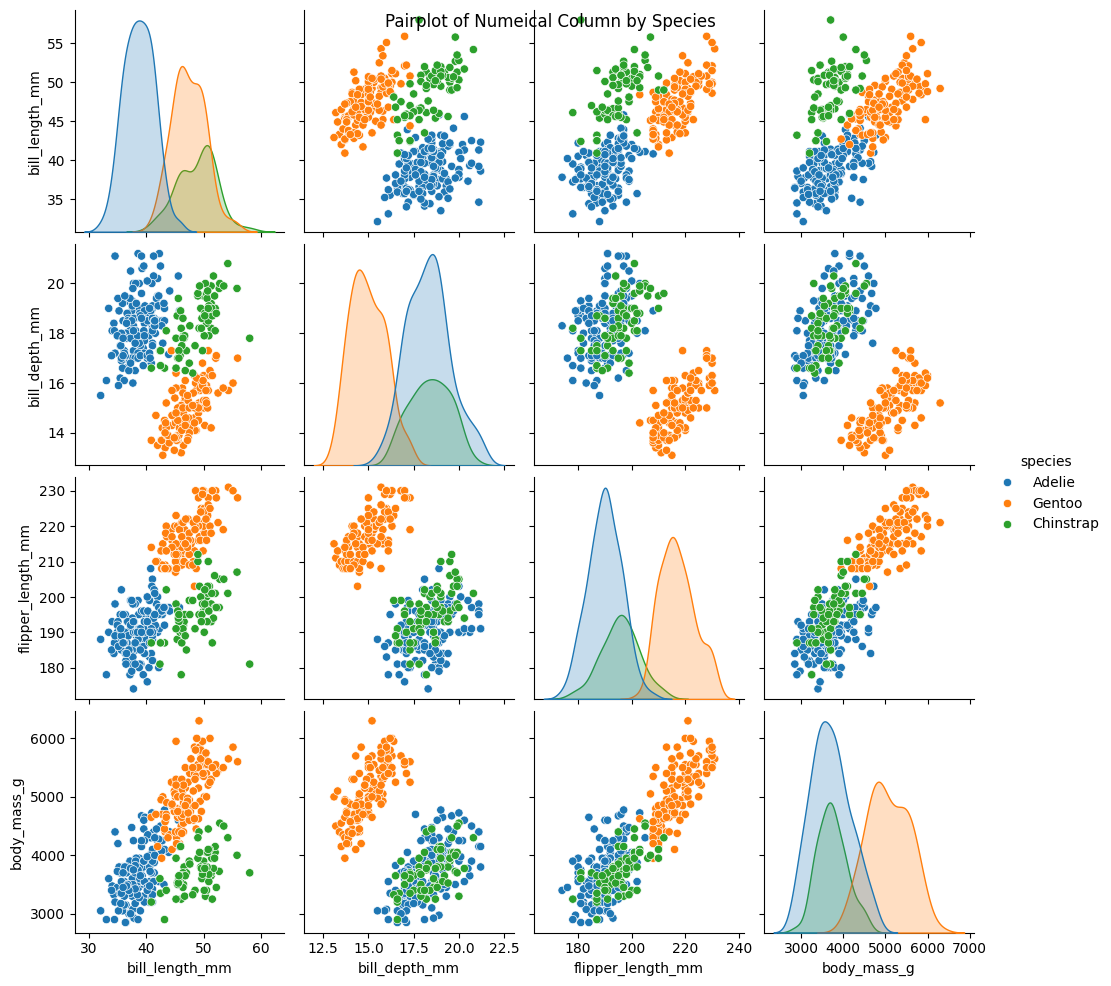

In [39]:
penguins_no_year = new_penguins.drop(columns='year')
sns.pairplot(penguins_no_year, hue='species')
plt.suptitle('Pairplot of Numeical Column by Species')
#plt.tight_layout()
plt.show()

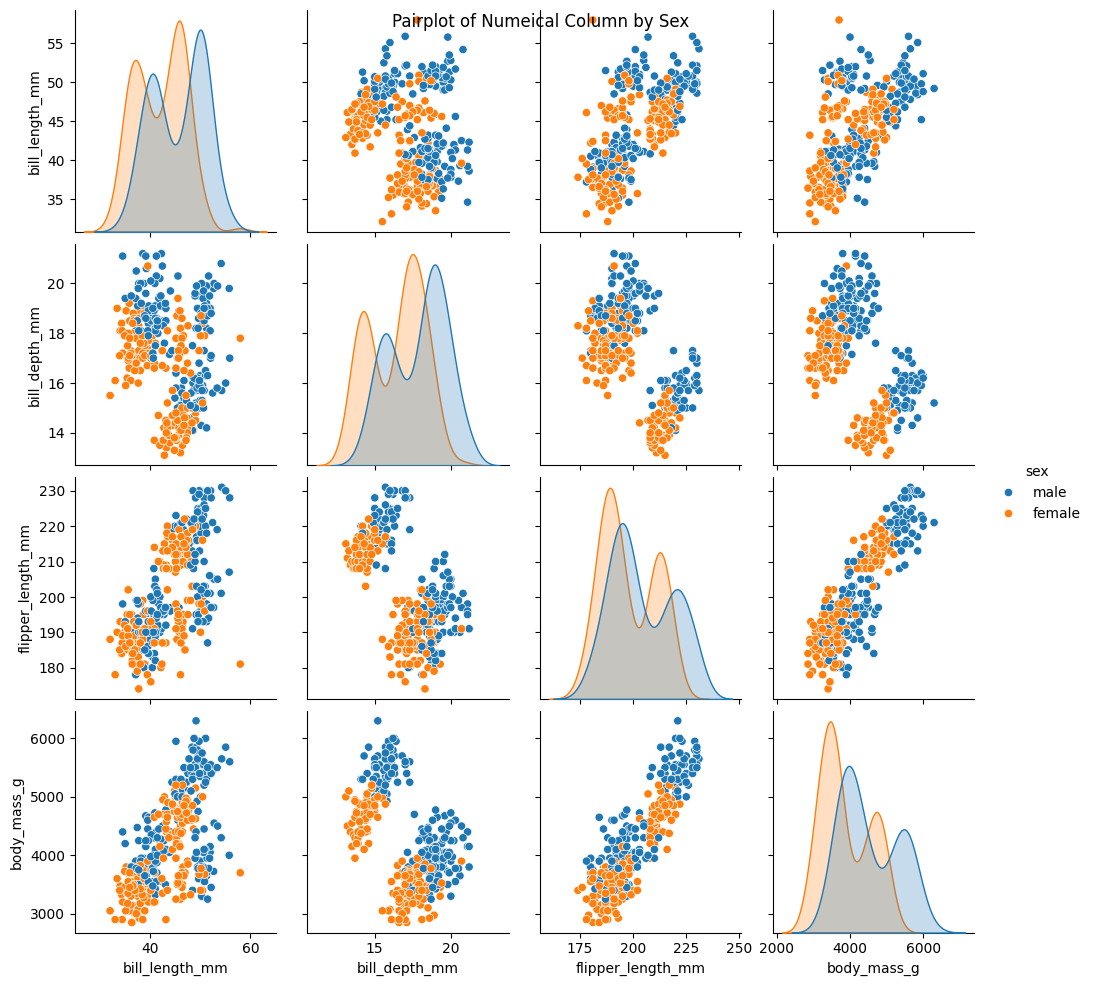

In [40]:
penguins_no_year = new_penguins.drop(columns='year')
sns.pairplot(penguins_no_year, hue='sex')
plt.suptitle('Pairplot of Numeical Column by Sex')
plt.show()

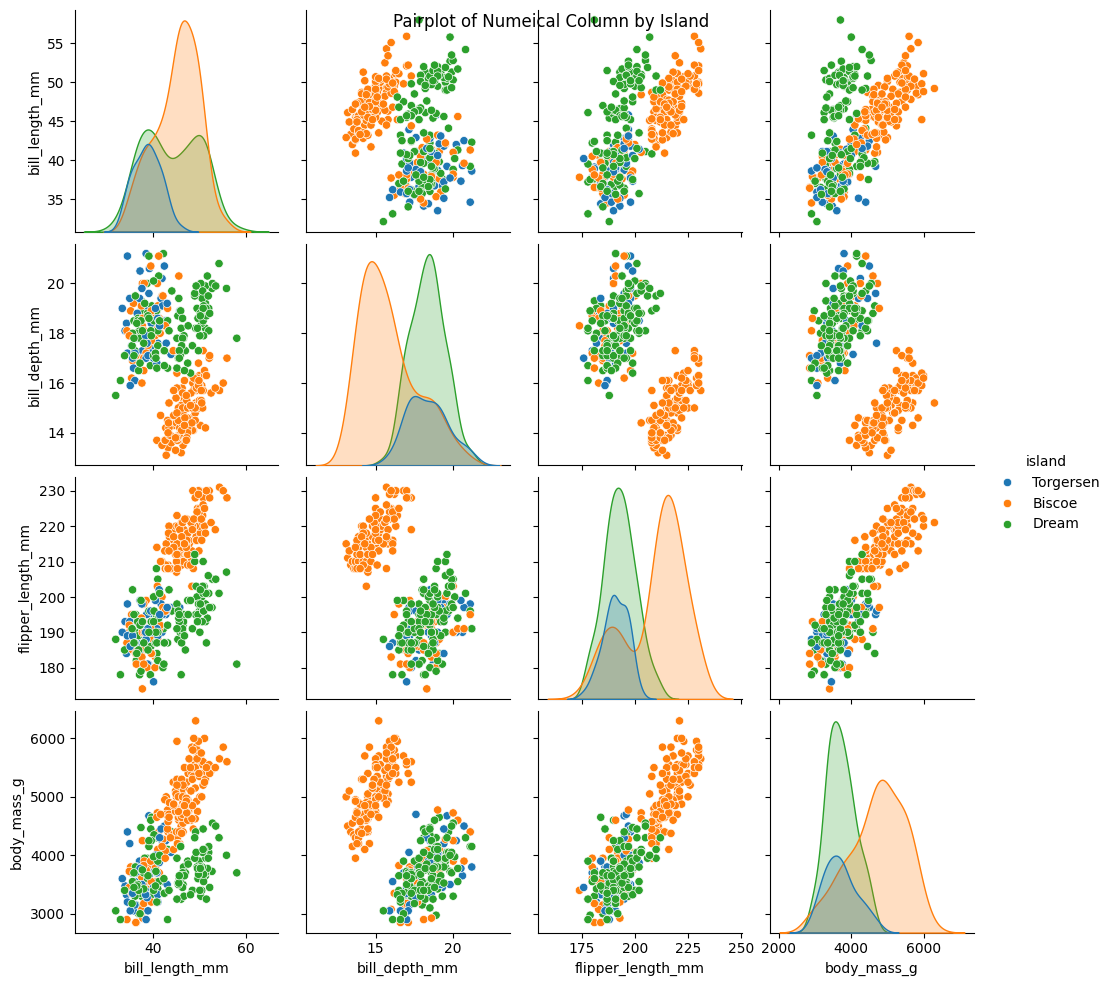

In [41]:
penguins_no_year = new_penguins.drop(columns='year')
sns.pairplot(penguins_no_year, hue='island')
plt.suptitle('Pairplot of Numeical Column by Island')
plt.show()

# correation heatmap

In [42]:
species

['Adelie', 'Gentoo', 'Chinstrap']

In [43]:
new_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,female,2007
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,male,2007
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
332,Chinstrap,Dream,55.80000,19.80000,207.0,4000.0,male,2009
333,Chinstrap,Dream,43.50000,18.10000,202.0,3400.0,female,2009
334,Chinstrap,Dream,49.60000,18.20000,193.0,3775.0,male,2009
335,Chinstrap,Dream,50.80000,19.00000,210.0,4100.0,male,2009


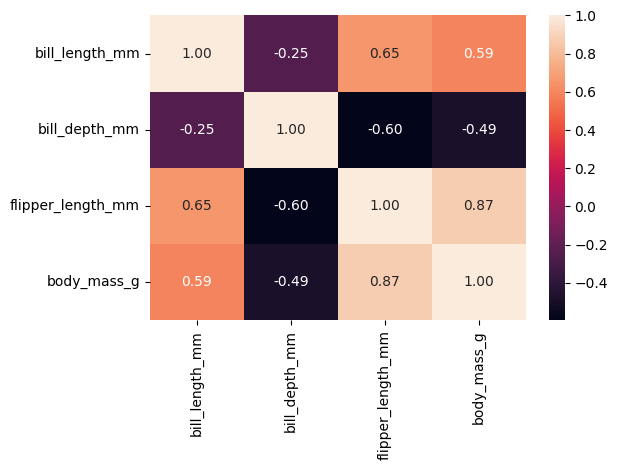

In [44]:

sns.heatmap(new_penguins[numeric_columns].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

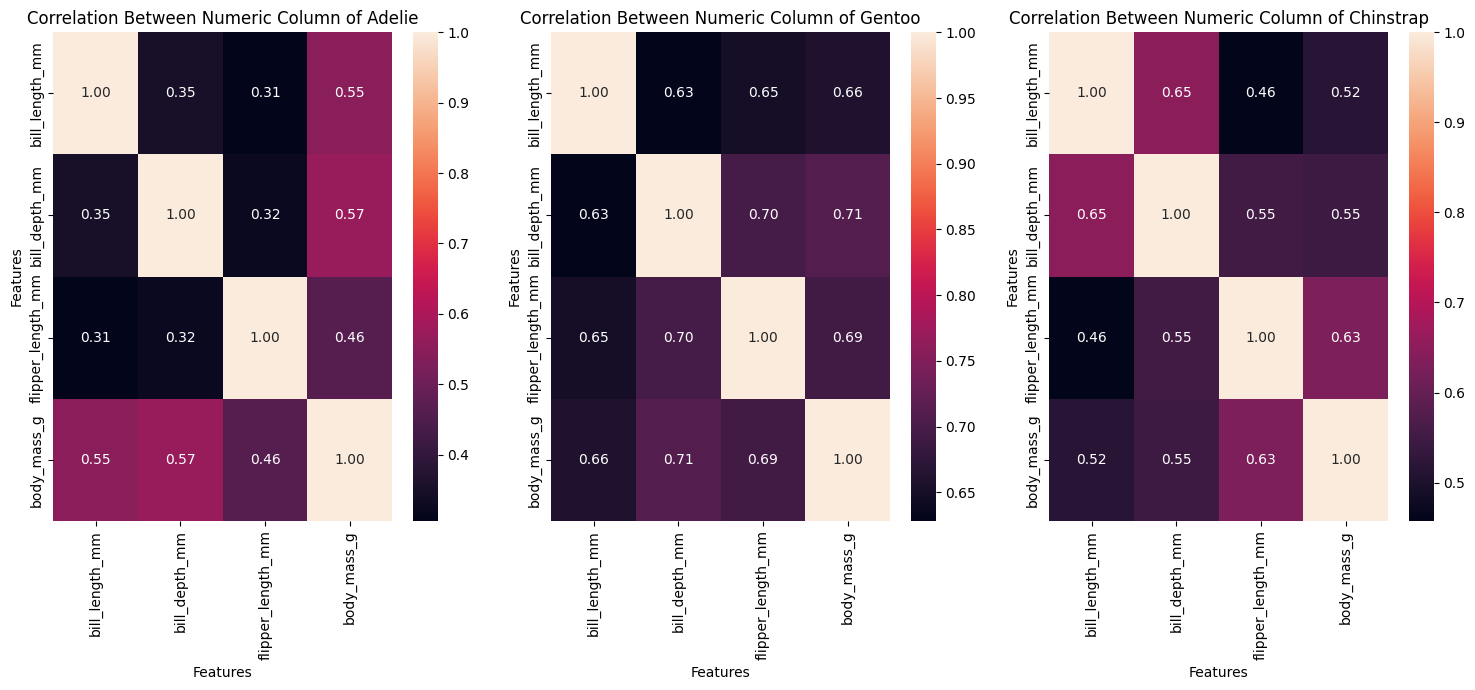

In [45]:
fig, ax = plt.subplots(1,3, figsize = (15,7))

for i, specie in enumerate(species):
    type_penguins = new_penguins[new_penguins['species'] == specie]
    sns.heatmap(type_penguins[numeric_columns].corr(), annot=True, fmt='.2f', ax = ax[i])
    ax[i].set_title(f'Correlation Between Numeric Column of {specie}')
    ax[i].set_xlabel(f'Features')
    ax[i].set_ylabel(f'Features')
    
plt.tight_layout()
plt.show()
    

# Classification

# K Neighbors Classifier

In [46]:
new_penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,female,2007
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,male,2007
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,female,2007


## Standardization

In [47]:
scalar = StandardScaler()
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
new_penguins_standardize = new_penguins[:]
new_penguins_standardize[numeric_columns] = scalar.fit_transform(new_penguins_standardize[numeric_columns])
new_penguins_standardize

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,-0.881442,0.804500,-1.427484,-0.569959,male,2007
1,Adelie,Torgersen,-0.807275,0.141310,-1.068751,-0.506942,female,2007
2,Adelie,Torgersen,-0.658939,0.447398,-0.423029,-1.200131,female,2007
3,Adelie,Torgersen,0.012637,0.014370,-0.279536,-0.191856,male,2007
4,Adelie,Torgersen,-1.326449,1.110587,-0.566523,-0.948062,female,2007
...,...,...,...,...,...,...,...,...
332,Chinstrap,Dream,2.215063,1.365660,0.437932,-0.254874,male,2009
333,Chinstrap,Dream,-0.065597,0.498412,0.079198,-1.011079,female,2009
334,Chinstrap,Dream,1.065462,0.549427,-0.566523,-0.538451,male,2009
335,Chinstrap,Dream,1.287966,0.957544,0.653173,-0.128839,male,2009


In [48]:
new_penguins_standardize['sex'].unique()

array(['male', 'female'], dtype=object)

In [49]:
new_penguins_standardize['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [50]:
new_penguins_standardize['sex'] = new_penguins_standardize['sex'].map({'male':0, 'female':1})

In [51]:
new_penguins_standardize = pd.get_dummies(new_penguins_standardize, columns=['island'], prefix='island')
new_penguins_standardize

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,-0.881442,0.804500,-1.427484,-0.569959,0,2007,False,False,True
1,Adelie,-0.807275,0.141310,-1.068751,-0.506942,1,2007,False,False,True
2,Adelie,-0.658939,0.447398,-0.423029,-1.200131,1,2007,False,False,True
3,Adelie,0.012637,0.014370,-0.279536,-0.191856,0,2007,False,False,True
4,Adelie,-1.326449,1.110587,-0.566523,-0.948062,1,2007,False,False,True
...,...,...,...,...,...,...,...,...,...,...
332,Chinstrap,2.215063,1.365660,0.437932,-0.254874,0,2009,False,True,False
333,Chinstrap,-0.065597,0.498412,0.079198,-1.011079,1,2009,False,True,False
334,Chinstrap,1.065462,0.549427,-0.566523,-0.538451,0,2009,False,True,False
335,Chinstrap,1.287966,0.957544,0.653173,-0.128839,0,2009,False,True,False


In [52]:
new_penguins_standardize.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'year', 'island_Biscoe', 'island_Dream',
       'island_Torgersen'],
      dtype='object')

In [53]:
new_penguins_standardize_drop_yr = new_penguins_standardize.drop(columns='year')
new_penguins_standardize_drop_yr

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,-0.881442,0.804500,-1.427484,-0.569959,0,False,False,True
1,Adelie,-0.807275,0.141310,-1.068751,-0.506942,1,False,False,True
2,Adelie,-0.658939,0.447398,-0.423029,-1.200131,1,False,False,True
3,Adelie,0.012637,0.014370,-0.279536,-0.191856,0,False,False,True
4,Adelie,-1.326449,1.110587,-0.566523,-0.948062,1,False,False,True
...,...,...,...,...,...,...,...,...,...
332,Chinstrap,2.215063,1.365660,0.437932,-0.254874,0,False,True,False
333,Chinstrap,-0.065597,0.498412,0.079198,-1.011079,1,False,True,False
334,Chinstrap,1.065462,0.549427,-0.566523,-0.538451,0,False,True,False
335,Chinstrap,1.287966,0.957544,0.653173,-0.128839,0,False,True,False


### With SEX

In [54]:
X = new_penguins_standardize_drop_yr.drop(columns=['species'])
y = new_penguins_standardize_drop_yr['species']

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, random_state=10, test_size=0.2)

In [55]:
Xtr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
25,-0.603313,0.753485,-1.283991,-0.822028,0,True,False,False
309,0.954211,1.212617,0.653173,-0.317891,0,False,True,False
202,0.490662,-1.389128,1.155400,0.879435,1,True,False,False
105,-1.048320,1.467690,-0.781763,-0.380908,0,True,False,False
59,-0.473520,2.028850,-0.423029,0.249264,0,True,False,False
...,...,...,...,...,...,...,...,...
123,-0.603313,0.957544,-0.136042,-0.254874,0,False,False,True
320,1.399217,0.957544,0.007451,-0.317891,0,False,True,False
15,-1.344991,0.345369,-1.140497,-0.632976,1,False,False,True
125,-0.436436,0.600442,-0.423029,0.123229,0,False,False,True


In [56]:
kf = StratifiedKFold(n_splits=9, random_state=10, shuffle= True)

max_k = 15

training_f1 = [[] for _ in range(max_k)]
validation_f1 = [[] for _ in range(max_k)]

# loop over the values of k
for k in range(max_k):

    knn = KNeighborsClassifier(n_neighbors= k+1)
    # loop over the cross-validation splits
    for train_index, val_index in kf.split(Xtr, Ytr):

        Xtrain, Xval = Xtr.iloc[train_index], Xtr.iloc[val_index]
        Ytrain, Yval = Ytr.iloc[train_index], Ytr.iloc[val_index]
        model = knn.fit(Xtrain, Ytrain)

        pred_train = model.predict(Xtrain)
        pred_val = model.predict(Xval)

        # calculate training and validation f1 and store 
        training_f1[k].append(f1_score(Ytrain, pred_train, average='macro'))
        validation_f1[k].append(f1_score(Yval, pred_val, average='macro'))
        
        
# calculate the mean training and validation f1 across splits for each k
train_f1_mean = np.mean(training_f1, axis=1)
validation_f1_mean = np.mean(validation_f1, axis=1)



Text(0, 0.5, 'F1 Score')

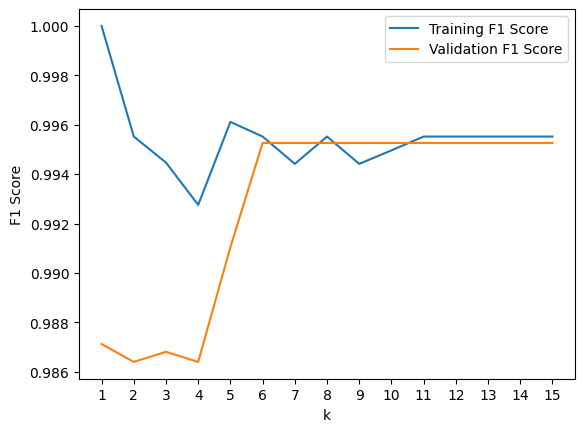

In [57]:
# plot the mean training and validation f1 against each value of k
fig, ax = plt.subplots()
ax.plot(np.arange(1,max_k+1), train_f1_mean, label='Training F1 Score')
ax.plot(np.arange(1,max_k+1), validation_f1_mean, label='Validation F1 Score')
plt.legend()
plt.xlabel('k')
ax.set_xticks(np.arange(1, max_k+1))
plt.ylabel('F1 Score')

In [58]:
knn_tune_by_hand = KNeighborsClassifier(n_neighbors=5)
# fit on the training data
knn_tune_by_hand.fit(Xtr, Ytr)
# prediction on the test data
ytest_pred = knn_tune_by_hand.predict(Xtest)
ytrain_pred = knn_tune_by_hand.predict(Xtr)

In [59]:
acc_knn_train_sex = accuracy_score(Ytr, ytrain_pred)
acc_knn_test_sex = accuracy_score(Ytest, ytest_pred)


precise_knn_train_sex = precision_score(Ytr, ytrain_pred, average='macro')
precise_knn_test_sex = precision_score(Ytest, ytest_pred, average='macro')

rec_knn_train_sex = recall_score(Ytr, ytrain_pred, average='macro')
rec_knn_test_sex = recall_score(Ytest, ytest_pred, average='macro')

f1_knn_train_sex = f1_score(Ytr, ytrain_pred, average='macro')
f1_knn_test_sex = f1_score(Ytest, ytest_pred, average='macro')

print(f"accuracy of KNeighbors Classifier for train when consider SEX is {acc_knn_train_sex:.4f}")
print(f"accuracy of KNeighbors Classifier for test when consider SEX is {acc_knn_test_sex:.4f}")

print(f"precision of KNeighbors Classifier for train when consider SEX is {precise_knn_train_sex:.4f}")
print(f"precision of KNeighbors Classifier for test when consider SEX is {precise_knn_test_sex:.4f}")

print(f"recall of KNeighbors Classifier for train when consider SEX is {rec_knn_train_sex:.4f}")
print(f"recall of KNeighbors Classifier for test when consider SEX is {rec_knn_test_sex:.4f}")

print(f"f1 of KNeighbors Classifier for train when consider SEX is {f1_knn_train_sex:.4f}")
print(f"f1 of KNeighbors Classifier for test when consider SEX is {f1_knn_test_sex:.4f}")



accuracy of KNeighbors Classifier for train when consider SEX is 0.9963
accuracy of KNeighbors Classifier for test when consider SEX is 1.0000
precision of KNeighbors Classifier for train when consider SEX is 0.9939
precision of KNeighbors Classifier for test when consider SEX is 1.0000
recall of KNeighbors Classifier for train when consider SEX is 0.9973
recall of KNeighbors Classifier for test when consider SEX is 1.0000
f1 of KNeighbors Classifier for train when consider SEX is 0.9956
f1 of KNeighbors Classifier for test when consider SEX is 1.0000


In [60]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}

knn_turn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(knn_turn_grid, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xtr, Ytr)

print(f'best parameters: {grid_search.best_params_}')
print(f'best F1 score: {grid_search.best_score_}')

best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
best F1 score: 0.9956695156695157


In [61]:
best_params_knn_sex = grid_search.best_params_
print(best_params_knn_sex)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [62]:
# set parameter based on better score
knn_tune_best = KNeighborsClassifier(n_neighbors= 4, algorithm = 'auto', leaf_size=30, p=1, weights = 'distance')
# fit on the training data
knn_tune_best.fit(Xtr, Ytr)

ytest_pred = knn_tune_best.predict(Xtest)
ytrain_pred = knn_tune_best.predict(Xtr)

In [63]:
acc_knn_train_sex = accuracy_score(Ytr, ytrain_pred)
acc_knn_test_sex = accuracy_score(Ytest, ytest_pred)


precise_knn_train_sex = precision_score(Ytr, ytrain_pred, average='macro')
precise_knn_test_sex = precision_score(Ytest, ytest_pred, average='macro')

rec_knn_train_sex = recall_score(Ytr, ytrain_pred, average='macro')
rec_knn_test_sex = recall_score(Ytest, ytest_pred, average='macro')

f1_knn_train_sex = f1_score(Ytr, ytrain_pred, average='macro')
f1_knn_test_sex = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of KNeighbors Classifier for train when consider SEX is {acc_knn_train_sex:.4f}")
print(f"accuracy of KNeighbors Classifier for test when consider SEX is {acc_knn_test_sex:.4f}")

print(f"precision of KNeighbors Classifier for train when consider SEX is {precise_knn_train_sex:.4f}")
print(f"precision of KNeighbors Classifier for test when consider SEX is {precise_knn_test_sex:.4f}")

print(f"recall of KNeighbors Classifier for train when consider SEX is {rec_knn_train_sex:.4f}")
print(f"recall of KNeighbors Classifier for test when consider SEX is {rec_knn_test_sex:.4f}")

print(f"f1 of KNeighbors Classifier for train when consider SEX is {f1_knn_train_sex:.4f}")
print(f"f1 of KNeighbors Classifier for test when consider SEX is {f1_knn_test_sex:.4f}")



accuracy of KNeighbors Classifier for train when consider SEX is 1.0000
accuracy of KNeighbors Classifier for test when consider SEX is 1.0000
precision of KNeighbors Classifier for train when consider SEX is 1.0000
precision of KNeighbors Classifier for test when consider SEX is 1.0000
recall of KNeighbors Classifier for train when consider SEX is 1.0000
recall of KNeighbors Classifier for test when consider SEX is 1.0000
f1 of KNeighbors Classifier for train when consider SEX is 1.0000
f1 of KNeighbors Classifier for test when consider SEX is 1.0000


Text(0.5, 23.52222222222222, 'Predicted Species')

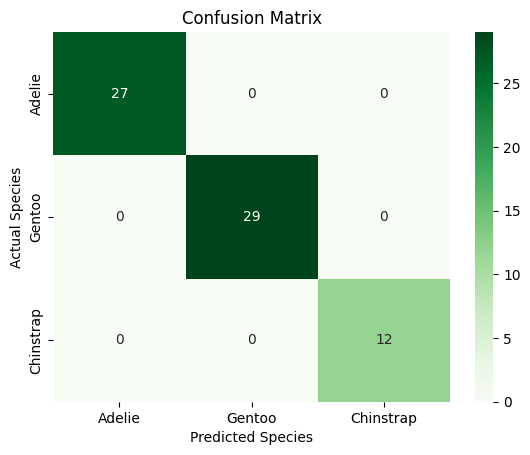

In [64]:
conf = confusion_matrix(Ytest, ytest_pred, labels = ['Adelie', 'Gentoo', 'Chinstrap'])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['Adelie', 'Gentoo', 'Chinstrap'], fmt="d", yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

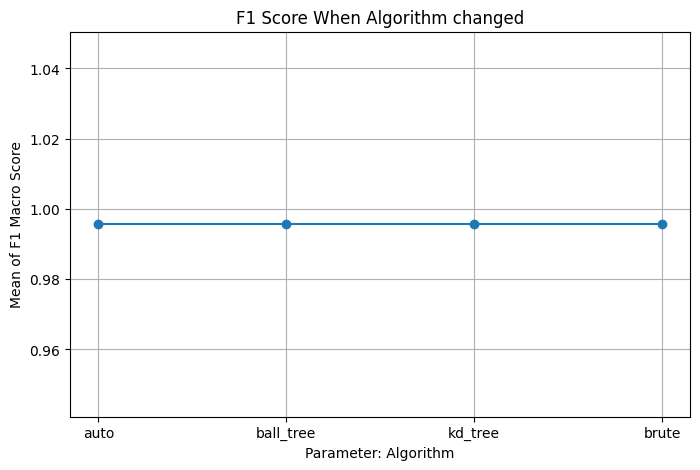

In [65]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_n_neighbors'] == best_params_knn_sex['n_neighbors']) &
    (results_fromgrid['param_algorithm'].isin(param_grid['algorithm'])) &
    (results_fromgrid['param_p'] == best_params_knn_sex['p']) &
    (results_fromgrid['param_leaf_size'] == best_params_knn_sex['leaf_size']) &
    (results_fromgrid['param_weights'] == best_params_knn_sex['weights']) 
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_algorithm'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Algorithm')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Algorithm changed')
plt.grid(True)
plt.show()

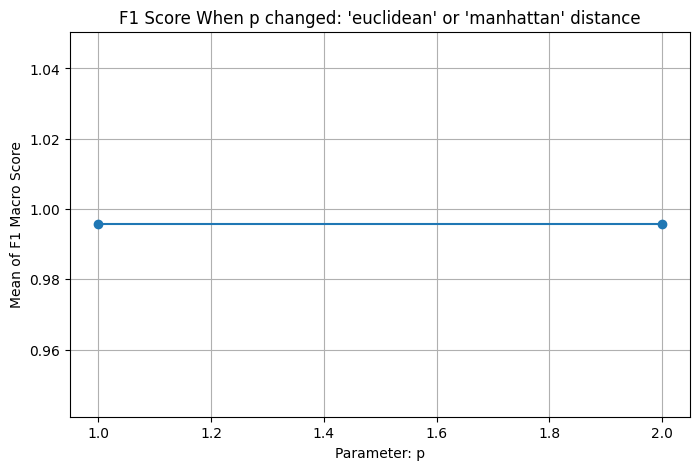

In [66]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_n_neighbors'] == best_params_knn_sex['n_neighbors']) &
    (results_fromgrid['param_algorithm'] == best_params_knn_sex['algorithm']) &
    (results_fromgrid['param_p'].isin(param_grid['p'])) &
    (results_fromgrid['param_weights'] == best_params_knn_sex['weights']) &
    (results_fromgrid['param_leaf_size'] == best_params_knn_sex['leaf_size']) 
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_p'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: p')
plt.ylabel('Mean of F1 Macro Score')
plt.title("F1 Score When p changed: 'euclidean' or 'manhattan' distance")
plt.grid(True)
plt.show()

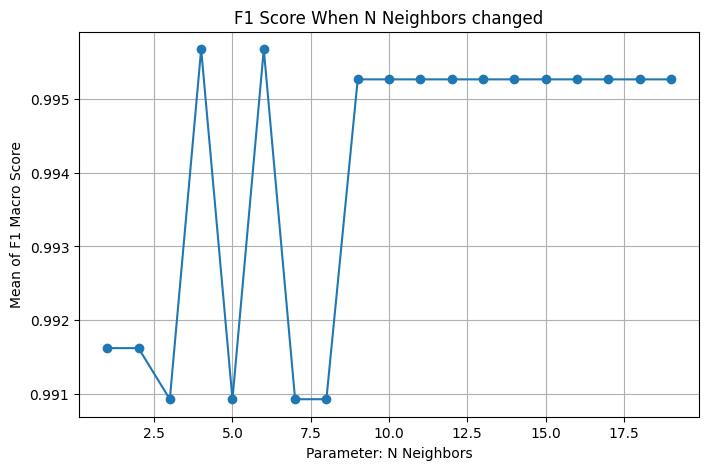

In [67]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_algorithm'] == best_params_knn_sex['algorithm']) &
    (results_fromgrid['param_p'] == best_params_knn_sex['p']) &
    (results_fromgrid['param_weights'] == best_params_knn_sex['weights']) &
    (results_fromgrid['param_leaf_size'] == best_params_knn_sex['leaf_size']) 
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_n_neighbors'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: N Neighbors')
plt.ylabel('Mean of F1 Macro Score')
plt.title("F1 Score When N Neighbors changed")
plt.grid(True)
plt.show()

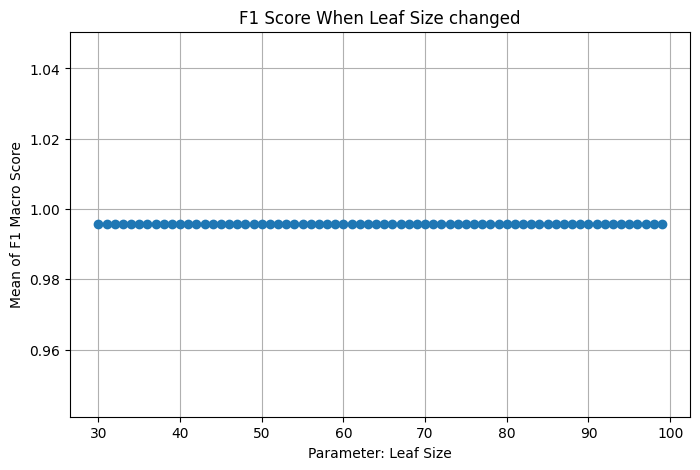

In [68]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_algorithm'] == best_params_knn_sex['algorithm']) &
    (results_fromgrid['param_p'] == best_params_knn_sex['p']) &
    (results_fromgrid['param_weights'] == best_params_knn_sex['weights']) &
    (results_fromgrid['param_n_neighbors'] == best_params_knn_sex['n_neighbors']) 
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_leaf_size'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Leaf Size')
plt.ylabel('Mean of F1 Macro Score')
plt.title("F1 Score When Leaf Size changed")
plt.grid(True)
plt.show()

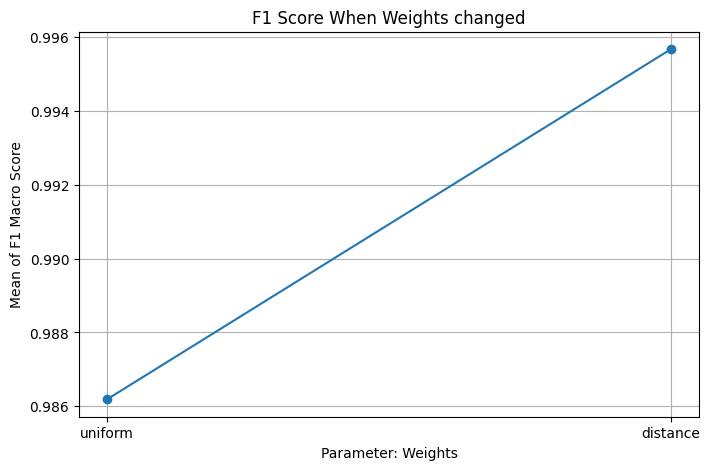

In [69]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_algorithm'] == best_params_knn_sex['algorithm']) &
    (results_fromgrid['param_p'] == best_params_knn_sex['p']) &
    (results_fromgrid['param_leaf_size'] == best_params_knn_sex['leaf_size']) &
    (results_fromgrid['param_n_neighbors'] == best_params_knn_sex['n_neighbors']) 
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_weights'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Weights')
plt.ylabel('Mean of F1 Macro Score')
plt.title("F1 Score When Weights changed")
plt.grid(True)
plt.show()

Using 269 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/68 [00:00<?, ?it/s]

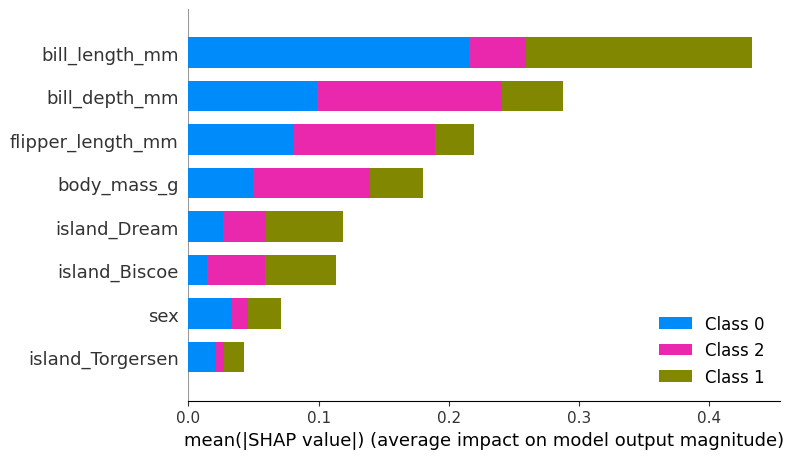

In [70]:
# use KernelExplainer to help interpret
explainer = shap.KernelExplainer(knn_tune_best.predict_proba, Xtr) 

# SHAP values
shap_values = explainer.shap_values(Xtest)

shap.summary_plot(shap_values, Xtest, feature_names=Xtest.columns)

### Without SEX

In [71]:
X = new_penguins_standardize_drop_yr.drop(columns=['species', 'sex'])
y = new_penguins_standardize_drop_yr['species']

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

In [72]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)

max_k = 15

training_f1 = [[] for _ in range(max_k)]
validation_f1 = [[] for _ in range(max_k)]

# loop over the values of k
for k in range(max_k):
    
    knn_ns = KNeighborsClassifier(n_neighbors= k+1)
    # loop over the cross-validation splits
    for train_index, val_index in kf.split(Xtr, Ytr):

        Xtrain, Xval = Xtr.iloc[train_index], Xtr.iloc[val_index]
        Ytrain, Yval = Ytr.iloc[train_index], Ytr.iloc[val_index]
        model = knn_ns.fit(Xtrain, Ytrain)

        pred_train = model.predict(Xtrain)
        pred_val = model.predict(Xval)

        training_f1[k].append(f1_score(Ytrain, pred_train, average='macro'))
        validation_f1[k].append(f1_score(Yval, pred_val, average='macro'))
        
# calculate the mean training and validation f1 across splits for each k
train_f1_mean = np.mean(training_f1, axis=1)
validation_f1_mean = np.mean(validation_f1, axis=1)

Text(0, 0.5, 'F1 score')

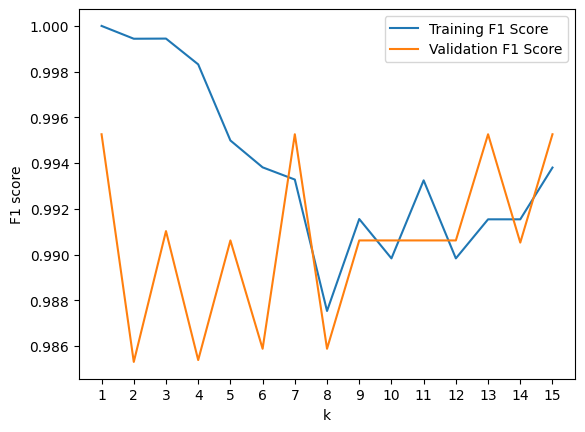

In [73]:
# plot the mean training and validation f1 against each value of k
fig, ax = plt.subplots()
ax.plot(np.arange(1,max_k+1), train_f1_mean, label='Training F1 Score')
ax.plot(np.arange(1,max_k+1), validation_f1_mean, label='Validation F1 Score')
plt.legend()
plt.xlabel('k')
ax.set_xticks(np.arange(1, max_k+1))
plt.ylabel('F1 score')

In [74]:
knn_ns_7 = KNeighborsClassifier(n_neighbors= 7)
# fit the classifier on the training data
knn_ns_7.fit(Xtr, Ytr)

ytest_pred = knn_ns_7.predict(Xtest)
ytrain_pred = knn_ns_7.predict(Xtr)

In [75]:
acc_knn_train_sex = accuracy_score(Ytr, ytrain_pred)
acc_knn_test_sex = accuracy_score(Ytest, ytest_pred)


precise_knn_train_sex = precision_score(Ytr, ytrain_pred, average='macro')
precise_knn_test_sex = precision_score(Ytest, ytest_pred, average='macro')

rec_knn_train_sex = recall_score(Ytr, ytrain_pred, average='macro')
rec_knn_test_sex = recall_score(Ytest, ytest_pred, average='macro')

f1_knn_train_sex = f1_score(Ytr, ytrain_pred, average='macro')
f1_knn_test_sex = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of KNeighbors Classifier for train when not consider SEX is {acc_knn_train_sex:.4f}")
print(f"accuracy of KNeighbors Classifier for test when not consider SEX is {acc_knn_test_sex:.4f}")

print(f"precision of KNeighbors Classifier for train when not consider SEX is {precise_knn_train_sex:.4f}")
print(f"precision of KNeighbors Classifier for test when not consider SEX is {precise_knn_test_sex:.4f}")

print(f"recall of KNeighbors Classifier for train when not consider SEX is {rec_knn_train_sex:.4f}")
print(f"recall of KNeighbors Classifier for test when not consider SEX is {rec_knn_test_sex:.4f}")

print(f"f1 of KNeighbors Classifier for train when not consider SEX is {f1_knn_train_sex:.4f}")
print(f"f1 of KNeighbors Classifier for test when not consider SEX is {f1_knn_test_sex:.4f}")



accuracy of KNeighbors Classifier for train when not consider SEX is 0.9963
accuracy of KNeighbors Classifier for test when not consider SEX is 1.0000
precision of KNeighbors Classifier for train when not consider SEX is 0.9973
precision of KNeighbors Classifier for test when not consider SEX is 1.0000
recall of KNeighbors Classifier for train when not consider SEX is 0.9938
recall of KNeighbors Classifier for test when not consider SEX is 1.0000
f1 of KNeighbors Classifier for train when not consider SEX is 0.9955
f1 of KNeighbors Classifier for test when not consider SEX is 1.0000


Text(0.5, 23.52222222222222, 'Predicted Species')

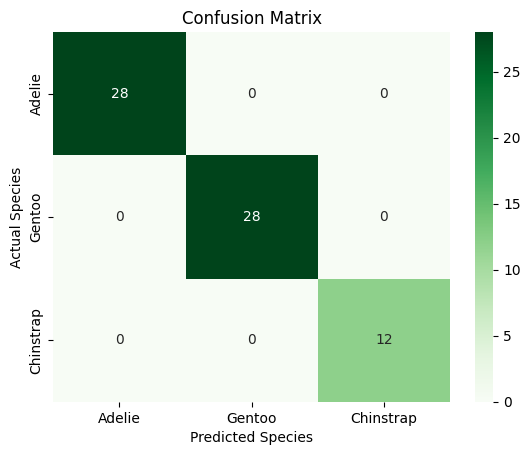

In [76]:
conf = confusion_matrix(Ytest, ytest_pred, labels = ['Adelie', 'Gentoo', 'Chinstrap'])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['Adelie', 'Gentoo', 'Chinstrap'], fmt="d", yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

In [77]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)
param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


knn_turn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(knn_turn_grid, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xtr, Ytr)

print(f'best parameters: {grid_search.best_params_}')
print(f'best F1 score: {grid_search.best_score_}')

best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
best F1 score: 0.9952612545205137


In [78]:
best_params_knn_nosex = grid_search.best_params_
print(best_params_knn_nosex)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [79]:
knn_ns_tune_best = KNeighborsClassifier(n_neighbors= 1, algorithm = 'auto', leaf_size=30, p = 2, weights='uniform') 

knn_ns_tune_best.fit(Xtr, Ytr)

ytest_pred = knn_ns_tune_best.predict(Xtest)
ytrain_pred = knn_ns_tune_best.predict(Xtr)

In [80]:
acc_knn_train_sex = accuracy_score(Ytr, ytrain_pred)
acc_knn_test_sex = accuracy_score(Ytest, ytest_pred)


precise_knn_train_sex = precision_score(Ytr, ytrain_pred, average='macro')
precise_knn_test_sex = precision_score(Ytest, ytest_pred, average='macro')

rec_knn_train_sex = recall_score(Ytr, ytrain_pred, average='macro')
rec_knn_test_sex = recall_score(Ytest, ytest_pred, average='macro')

f1_knn_train_sex = f1_score(Ytr, ytrain_pred, average='macro')
f1_knn_test_sex = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of KNeighbors Classifier for train when not consider SEX is {acc_knn_train_sex:.4f}")
print(f"accuracy of KNeighbors Classifier for test when not consider SEX is {acc_knn_test_sex:.4f}")

print(f"precision of KNeighbors Classifier for train when not consider SEX is {precise_knn_train_sex:.4f}")
print(f"precision of KNeighbors Classifier for test when not consider SEX is {precise_knn_test_sex:.4f}")

print(f"recall of KNeighbors Classifier for train when not consider SEX is {rec_knn_train_sex:.4f}")
print(f"recall of KNeighbors Classifier for test when not consider SEX is {rec_knn_test_sex:.4f}")

print(f"f1 of KNeighbors Classifier for train when not consider SEX is {f1_knn_train_sex:.4f}")
print(f"f1 of KNeighbors Classifier for test when not consider SEX is {f1_knn_test_sex:.4f}")


accuracy of KNeighbors Classifier for train when not consider SEX is 1.0000
accuracy of KNeighbors Classifier for test when not consider SEX is 0.9853
precision of KNeighbors Classifier for train when not consider SEX is 1.0000
precision of KNeighbors Classifier for test when not consider SEX is 0.9885
recall of KNeighbors Classifier for train when not consider SEX is 1.0000
recall of KNeighbors Classifier for test when not consider SEX is 0.9722
f1 of KNeighbors Classifier for train when not consider SEX is 1.0000
f1 of KNeighbors Classifier for test when not consider SEX is 0.9797


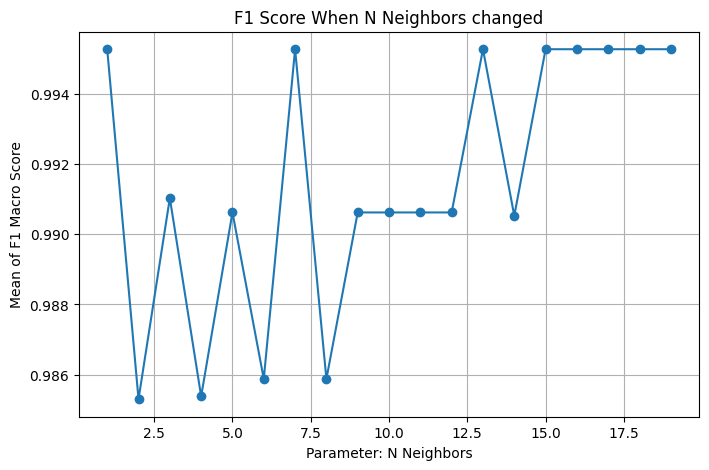

In [81]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_algorithm'] == best_params_knn_nosex['algorithm']) &
    (results_fromgrid['param_p'] == best_params_knn_nosex['p']) &
    (results_fromgrid['param_weights'] == best_params_knn_nosex['weights']) &
    (results_fromgrid['param_leaf_size'] == best_params_knn_nosex['leaf_size']) 
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_n_neighbors'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: N Neighbors')
plt.ylabel('Mean of F1 Macro Score')
plt.title("F1 Score When N Neighbors changed")
plt.grid(True)
plt.show()

In [82]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)
param_grid = {
    'n_neighbors': list(range(5, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


knn_turn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(knn_turn_grid, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xtr, Ytr)

print(f'best parameters: {grid_search.best_params_}')
print(f'best F1 score: {grid_search.best_score_}')

best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
best F1 score: 0.9952612545205137


In [83]:
best_params_knn_nosex_no1 = grid_search.best_params_
print(best_params_knn_nosex_no1)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [84]:
knn_ns_tune_best = KNeighborsClassifier(n_neighbors= 7, algorithm = 'auto', leaf_size=30, p = 2, weights='uniform') 

knn_ns_tune_best.fit(Xtr, Ytr)

ytest_pred = knn_ns_tune_best.predict(Xtest)
ytrain_pred = knn_ns_tune_best.predict(Xtr)



In [85]:
acc_knn_train_sex = accuracy_score(Ytr, ytrain_pred)
acc_knn_test_sex = accuracy_score(Ytest, ytest_pred)


precise_knn_train_sex = precision_score(Ytr, ytrain_pred, average='macro')
precise_knn_test_sex = precision_score(Ytest, ytest_pred, average='macro')

rec_knn_train_sex = recall_score(Ytr, ytrain_pred, average='macro')
rec_knn_test_sex = recall_score(Ytest, ytest_pred, average='macro')

f1_knn_train_sex = f1_score(Ytr, ytrain_pred, average='macro')
f1_knn_test_sex = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of KNeighbors Classifier for train when not consider SEX is {acc_knn_train_sex:.4f}")
print(f"accuracy of KNeighbors Classifier for test when not consider SEX is {acc_knn_test_sex:.4f}")

print(f"precision of KNeighbors Classifier for train when not consider SEX is {precise_knn_train_sex:.4f}")
print(f"precision of KNeighbors Classifier for test when not consider SEX is {precise_knn_test_sex:.4f}")

print(f"recall of KNeighbors Classifier for train when not consider SEX is {rec_knn_train_sex:.4f}")
print(f"recall of KNeighbors Classifier for test when not consider SEX is {rec_knn_test_sex:.4f}")

print(f"f1 of KNeighbors Classifier for train when not consider SEX is {f1_knn_train_sex:.4f}")
print(f"f1 of KNeighbors Classifier for test when not consider SEX is {f1_knn_test_sex:.4f}")


accuracy of KNeighbors Classifier for train when not consider SEX is 0.9963
accuracy of KNeighbors Classifier for test when not consider SEX is 1.0000
precision of KNeighbors Classifier for train when not consider SEX is 0.9973
precision of KNeighbors Classifier for test when not consider SEX is 1.0000
recall of KNeighbors Classifier for train when not consider SEX is 0.9938
recall of KNeighbors Classifier for test when not consider SEX is 1.0000
f1 of KNeighbors Classifier for train when not consider SEX is 0.9955
f1 of KNeighbors Classifier for test when not consider SEX is 1.0000


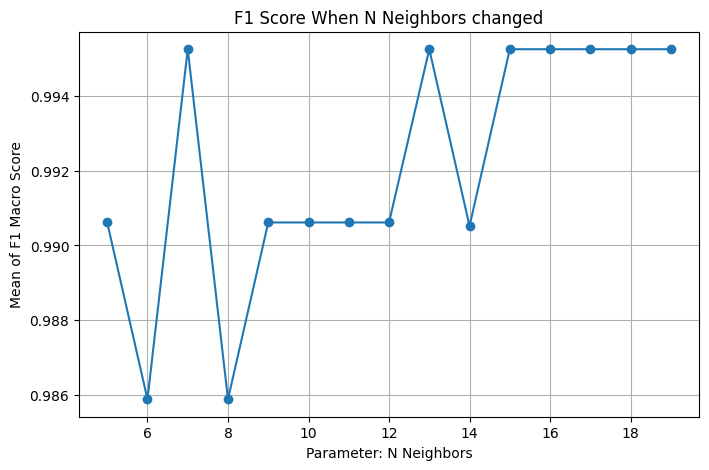

In [86]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot

param_grid = {
    'n_neighbors': list(range(1, 20)), 
    #'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': list(range(30, 100)),
    'weights': ['uniform', 'distance']
    
}


filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_algorithm'] == best_params_knn_nosex_no1['algorithm']) &
    (results_fromgrid['param_p'] == best_params_knn_nosex_no1['p']) &
    (results_fromgrid['param_weights'] == best_params_knn_nosex_no1['weights']) &
    (results_fromgrid['param_leaf_size'] == best_params_knn_nosex_no1['leaf_size']) 
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_n_neighbors'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: N Neighbors')
plt.ylabel('Mean of F1 Macro Score')
plt.title("F1 Score When N Neighbors changed")
plt.grid(True)
plt.show()

# Based line model


In [87]:
X = new_penguins_standardize_drop_yr.drop(columns=['species'])
y = new_penguins_standardize_drop_yr['species']

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

In [88]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=15) # to predict most frequent class
dummy_clf.fit(Xtr, Ytr)

dummy_pred_train = dummy_clf.predict(Xtr)
dummy_pred_test = dummy_clf.predict(Xtest)

In [89]:
acc_dummy_train_sex = accuracy_score(Ytr, dummy_pred_train)
acc_dummy_test_sex = accuracy_score(Ytest, dummy_pred_test)


precise_dummy_train_sex = precision_score(Ytr, dummy_pred_train, average='macro', zero_division=0)
precise_dummy_test_sex = precision_score(Ytest, dummy_pred_test, average='macro', zero_division=0)

rec_dummy_train_sex = recall_score(Ytr, dummy_pred_train, average='macro')
rec_dummy_test_sex = recall_score(Ytest, dummy_pred_test, average='macro')

f1_dummy_train_sex = f1_score(Ytr, dummy_pred_train, average='macro')
f1_dummy_test_sex = f1_score(Ytest, dummy_pred_test, average='macro')


print(f"accuracy of Based line model for train when consider SEX is {acc_dummy_train_sex:.4f}")
print(f"accuracy of Based linemodel for test when consider SEX is {acc_dummy_test_sex:.4f}")

print(f"precision of Based line model for train when consider SEX is {precise_dummy_train_sex:.4f}")
print(f"precision of Based line model for test when consider SEX is {precise_dummy_test_sex:.4f}")

print(f"recall of Based line model for train when consider SEX is {rec_dummy_train_sex:.4f}")
print(f"recall of Based line model for test when consider SEX is {rec_dummy_test_sex:.4f}")

print(f"f1 of Based line model for train when consider SEX is {f1_dummy_train_sex:.4f}")
print(f"f1 of Based line model for test when consider SEX is {f1_dummy_test_sex:.4f}")

accuracy of Based line model for train when consider SEX is 0.4498
accuracy of Based linemodel for test when consider SEX is 0.4118
precision of Based line model for train when consider SEX is 0.1499
precision of Based line model for test when consider SEX is 0.1373
recall of Based line model for train when consider SEX is 0.3333
recall of Based line model for test when consider SEX is 0.3333
f1 of Based line model for train when consider SEX is 0.2068
f1 of Based line model for test when consider SEX is 0.1944


In [90]:
print(f'Evaluation matric for Based line model for train when consider SEX is \n {classification_report(Ytr, dummy_pred_train, zero_division=0)}')
print(f'Evaluation matric forBased line model for test when consider SEX is \n {classification_report(Ytest, dummy_pred_test, zero_division=0)}')

Evaluation matric for Based line model for train when consider SEX is 
               precision    recall  f1-score   support

      Adelie       0.45      1.00      0.62       121
   Chinstrap       0.00      0.00      0.00        54
      Gentoo       0.00      0.00      0.00        94

    accuracy                           0.45       269
   macro avg       0.15      0.33      0.21       269
weighted avg       0.20      0.45      0.28       269

Evaluation matric forBased line model for test when consider SEX is 
               precision    recall  f1-score   support

      Adelie       0.41      1.00      0.58        28
   Chinstrap       0.00      0.00      0.00        12
      Gentoo       0.00      0.00      0.00        28

    accuracy                           0.41        68
   macro avg       0.14      0.33      0.19        68
weighted avg       0.17      0.41      0.24        68



Text(0.5, 23.52222222222222, 'Predicted Species')

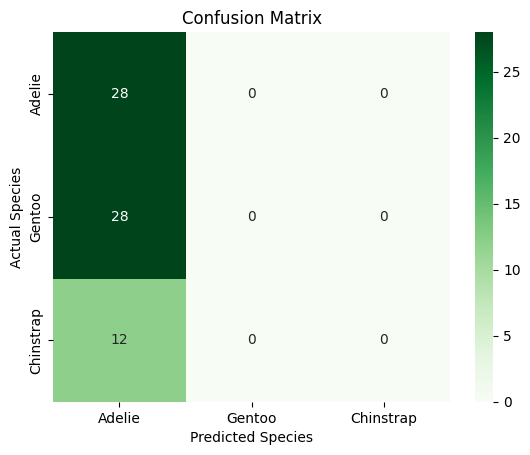

In [91]:
conf = confusion_matrix(Ytest, dummy_pred_test, labels = ['Adelie', 'Gentoo', 'Chinstrap'])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['Adelie', 'Gentoo', 'Chinstrap'], fmt="d", yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

# Ensemble Classification via Random Forest

In [92]:
X = new_penguins_standardize_drop_yr.drop(columns=['species'])
y = new_penguins_standardize_drop_yr['species']

X_train, Xtest, Y_train, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

In [93]:
new_penguins_standardize_drop_yr

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,-0.881442,0.804500,-1.427484,-0.569959,0,False,False,True
1,Adelie,-0.807275,0.141310,-1.068751,-0.506942,1,False,False,True
2,Adelie,-0.658939,0.447398,-0.423029,-1.200131,1,False,False,True
3,Adelie,0.012637,0.014370,-0.279536,-0.191856,0,False,False,True
4,Adelie,-1.326449,1.110587,-0.566523,-0.948062,1,False,False,True
...,...,...,...,...,...,...,...,...,...
332,Chinstrap,2.215063,1.365660,0.437932,-0.254874,0,False,True,False
333,Chinstrap,-0.065597,0.498412,0.079198,-1.011079,1,False,True,False
334,Chinstrap,1.065462,0.549427,-0.566523,-0.538451,0,False,True,False
335,Chinstrap,1.287966,0.957544,0.653173,-0.128839,0,False,True,False


In [94]:
# define the hyperparameter grid
param_grid = {
'n_estimators': [5, 10, 40, 70, 100],
'criterion': ['gini', 'entropy', 'log_loss'],
'max_depth': [1, 5, 10, 20, 40, 80, 100],
'min_samples_split': [1, 2, 3, 4, 5],
'min_samples_leaf': [1, 2, 3, 4, 5],
'min_weight_fraction_leaf': [0.1, 0.25, 0.5, 0.75],
'max_features': ['sqrt', 'log2']
}

In [95]:
rforest = RandomForestClassifier(random_state=15)
rforest

RandomForestClassifier(random_state=15)

In [96]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)

In [97]:
# initialize GridSearchCv
grid_search = GridSearchCV(estimator=rforest, scoring='f1_macro', param_grid=param_grid, cv= kf, n_jobs= -1) 

# git the model to data
grid_search.fit(X_train, Y_train)



75600 fits failed out of a total of 189000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37800 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/Library/Frameworks/Python.

GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=15, shuffle=True),
             estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20, 40, 80, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.25, 0.5, 0.75],
                         'n_estimators': [5, 10, 40, 70, 100]},
             scoring='f1_macro')

In [98]:
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
print(best_params, best_rf)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10} RandomForestClassifier(criterion='entropy', max_depth=5,
                       min_weight_fraction_leaf=0.1, n_estimators=10,
                       random_state=15)


In [99]:
# predict
ytest_pred = best_rf.predict(Xtest)
ytrain_pred = best_rf.predict(X_train)

In [100]:
# collect to best model
rforest_best = RandomForestClassifier(criterion = 'entropy', random_state=15, n_estimators=10, max_depth= 5, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf= 0.1)

In [101]:

#ytest_pred = rforest_best.predict(Xtest)
#ytrain_pred = rforest_best.predict(X_train)

acc_rf_train = accuracy_score(Y_train, ytrain_pred)
acc_rf_test = accuracy_score(Ytest, ytest_pred)

precise_rf_train = precision_score(Y_train, ytrain_pred, average='macro')
precise_rf_test = precision_score(Ytest, ytest_pred, average='macro')

rec_rf_train = recall_score(Y_train, ytrain_pred, average='macro')
rec_rf_test = recall_score(Ytest, ytest_pred, average='macro')

f1_rf_train = f1_score(Y_train, ytrain_pred, average='macro')
f1_rf_test = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of Random Forest for train when consider SEX is {acc_rf_train:.4f}")
print(f"accuracy of Random Forest for test when consider SEX is {acc_rf_test:.4f}")

print(f"precision of Random Forest for train when consider SEX is {precise_rf_train:.4f}")
print(f"precision of Random Forest for test when consider SEX is {precise_rf_test:.4f}")

print(f"recall of Random Forest for train when consider SEX is {rec_rf_train:.4f}")
print(f"recall of Random Forest for test when consider SEX is {rec_rf_test:.4f}")

print(f"f1 of Random Forest for train when consider SEX is {f1_rf_train:.4f}")
print(f"f1 of Random Forest for test when consider SEX is {f1_rf_test:.4f}")



accuracy of Random Forest for train when consider SEX is 0.9777
accuracy of Random Forest for test when consider SEX is 0.9706
precision of Random Forest for train when consider SEX is 0.9741
precision of Random Forest for test when consider SEX is 0.9524
recall of Random Forest for train when consider SEX is 0.9698
recall of Random Forest for test when consider SEX is 0.9762
f1 of Random Forest for train when consider SEX is 0.9717
f1 of Random Forest for test when consider SEX is 0.9620


Text(0.5, 23.52222222222222, 'Predicted Species')

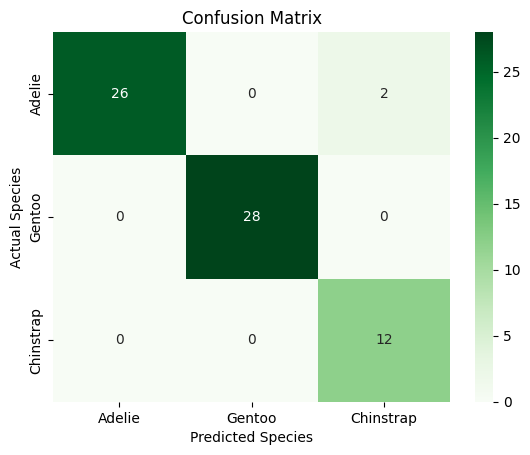

In [102]:
conf = confusion_matrix(Ytest, ytest_pred, labels = ['Adelie', 'Gentoo', 'Chinstrap'])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['Adelie', 'Gentoo', 'Chinstrap'], fmt="d", yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

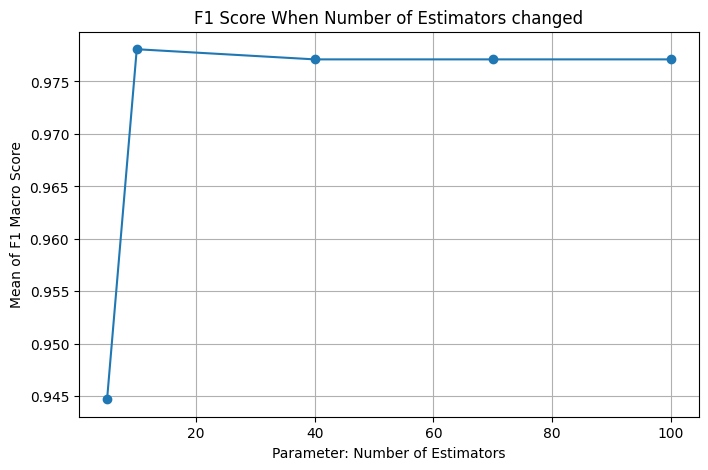

In [103]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_n_estimators'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Number of Estimators')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Number of Estimators changed')
plt.grid(True)
plt.show()

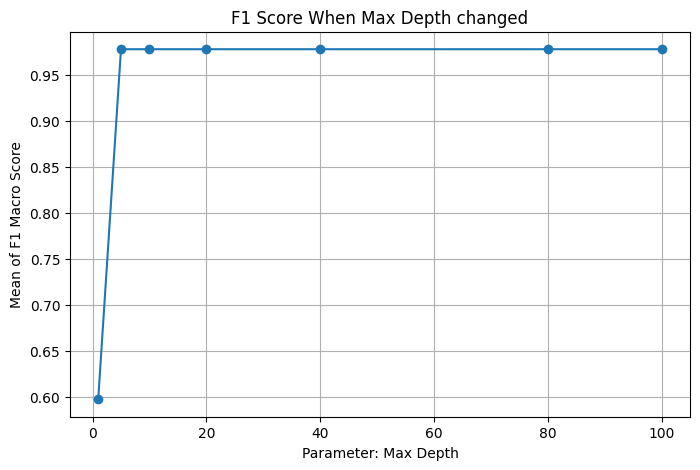

In [104]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_max_depth'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Max Depth')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Max Depth changed')
plt.grid(True)
plt.show()

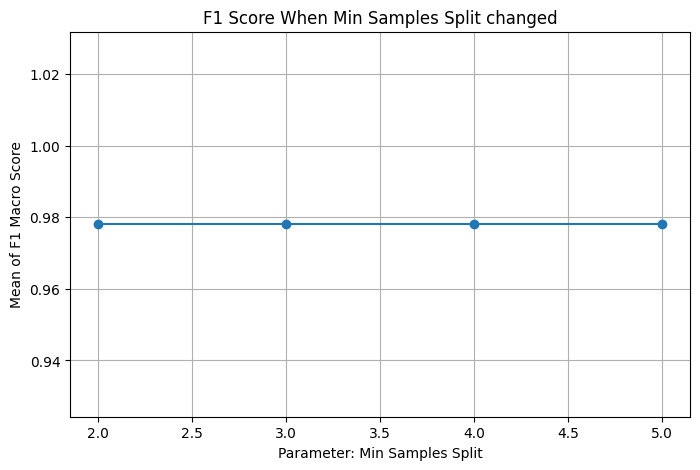

In [105]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_min_samples_split'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Min Samples Split')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Min Samples Split changed')
plt.grid(True)
plt.show()

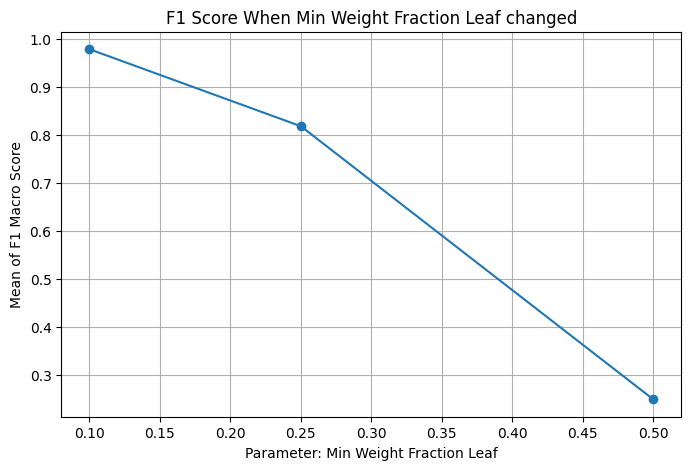

In [106]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_min_weight_fraction_leaf'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Min Weight Fraction Leaf')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Min Weight Fraction Leaf changed')
plt.grid(True)
plt.show()



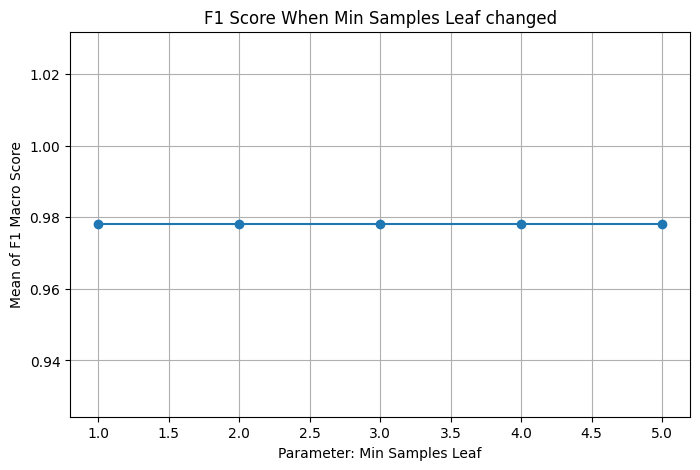

In [107]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_min_samples_leaf'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Min Samples Leaf')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Min Samples Leaf changed')
plt.grid(True)
plt.show()

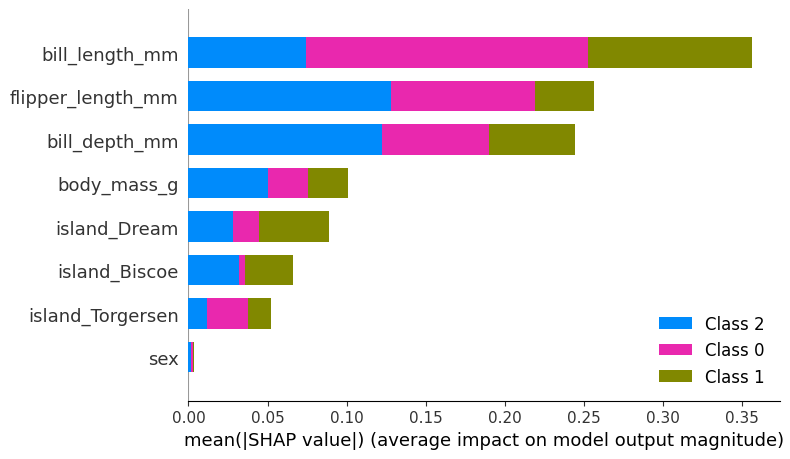

In [108]:
# use the best model to see SHAP
rforest_shap = RandomForestClassifier(criterion = 'gini', random_state=15, n_estimators=70, max_depth= 2, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf= 0.1)
rforest_shap.fit(X_train, Y_train)

# use TreeExplainer to help me interplet
explainer = shap.TreeExplainer(rforest_shap)

shap_values = explainer.shap_values(Xtest)

shap.summary_plot(shap_values, Xtest, feature_names=Xtest.columns)

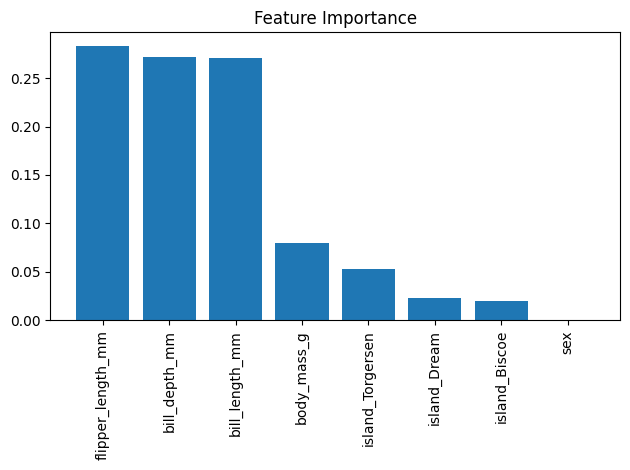

In [109]:
# get feature importances
feature_importances = best_rf.feature_importances_

features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), features[sorted_indices], rotation='vertical')
plt.tight_layout()
plt.show()

# Cut feature (SEX)

In [110]:
X = new_penguins_standardize_drop_yr.drop(columns=['species', 'sex'])
y = new_penguins_standardize_drop_yr['species']

X_train, Xtest, Y_train, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

In [111]:
# the hyperparameter grid
param_grid = {
'n_estimators': [5, 10, 40, 70, 100],
'criterion': ['gini', 'entropy', 'log_loss'],
'max_depth': [1, 5, 10, 20, 40, 80, 100],
'min_samples_split': [1, 2, 3, 4, 5],
'min_samples_leaf': [1, 2, 3, 4, 5],
'min_weight_fraction_leaf': [0.1, 0.25, 0.5, 0.75],
'max_features': ['sqrt', 'log2']
}

In [112]:
rforest_wosex = RandomForestClassifier(random_state=15)
rforest_wosex

RandomForestClassifier(random_state=15)

In [113]:
kf = StratifiedKFold(n_splits=9, random_state=15, shuffle= True)

In [114]:
# initialize GridSearchCv
grid_search = GridSearchCV(estimator=rforest_wosex, scoring='f1_macro', param_grid=param_grid, cv= kf, n_jobs= -1)

# git the model to data
grid_search.fit(X_train, Y_train)



75600 fits failed out of a total of 189000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37800 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/Library/Frameworks/Python.

GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=15, shuffle=True),
             estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20, 40, 80, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.25, 0.5, 0.75],
                         'n_estimators': [5, 10, 40, 70, 100]},
             scoring='f1_macro')

In [115]:
# get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf_wosex = grid_search.best_estimator_
print(best_params, best_rf_wosex)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10} RandomForestClassifier(max_depth=5, min_weight_fraction_leaf=0.1,
                       n_estimators=10, random_state=15)


In [116]:
# collect best condition 
rforest_best_wosex = RandomForestClassifier(criterion = 'gini', random_state=15, n_estimators=10, max_depth= 5, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf= 0.1)

In [117]:
# predict
ytest_pred = best_rf_wosex.predict(Xtest)
ytrain_pred = best_rf_wosex.predict(X_train)

In [118]:
acc_rf_train = accuracy_score(Y_train, ytrain_pred)
acc_rf_test = accuracy_score(Ytest, ytest_pred)

precise_rf_train = precision_score(Y_train, ytrain_pred, average='macro')
precise_rf_test = precision_score(Ytest, ytest_pred, average='macro')

rec_rf_train = recall_score(Y_train, ytrain_pred, average='macro')
rec_rf_test = recall_score(Ytest, ytest_pred, average='macro')

f1_rf_train = f1_score(Y_train, ytrain_pred, average='macro')
f1_rf_test = f1_score(Ytest, ytest_pred, average='macro')


print(f"accuracy of Random Forest for train when NOT consider SEX is {acc_rf_train:.4f}")
print(f"accuracy of Random Forest for test when NOT consider SEX is {acc_rf_test:.4f}")

print(f"precision of Random Forest for train when NOT consider SEX is {precise_rf_train:.4f}")
print(f"precision of Random Forest for test when NOT consider SEX is {precise_rf_test:.4f}")
 
print(f"recall of Random Forest for train when NOT consider SEX is {rec_rf_train:.4f}")
print(f"recall of Random Forest for test when consider SEX is {rec_rf_test:.4f}")

print(f"f1 of Random Forest for train when NOT consider SEX is {f1_rf_train:.4f}")
print(f"f1 of Random Forest for test when NOT consider SEX is {f1_rf_test:.4f}")

accuracy of Random Forest for train when NOT consider SEX is 0.9926
accuracy of Random Forest for test when NOT consider SEX is 0.9853
precision of Random Forest for train when NOT consider SEX is 0.9911
precision of Random Forest for test when NOT consider SEX is 0.9744
recall of Random Forest for train when NOT consider SEX is 0.9911
recall of Random Forest for test when consider SEX is 0.9881
f1 of Random Forest for train when NOT consider SEX is 0.9911
f1 of Random Forest for test when NOT consider SEX is 0.9806


In [119]:
print(f'Evaluation matric for Random Forest for train when NOT consider SEX is \n {classification_report(Y_train, ytrain_pred)}')
print(f'Evaluation matric for Random Forest for test when NOT consider SEX is \n {classification_report(Ytest, ytest_pred)}')

Evaluation matric for Random Forest for train when NOT consider SEX is 
               precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       121
   Chinstrap       0.98      0.98      0.98        54
      Gentoo       1.00      1.00      1.00        94

    accuracy                           0.99       269
   macro avg       0.99      0.99      0.99       269
weighted avg       0.99      0.99      0.99       269

Evaluation matric for Random Forest for test when NOT consider SEX is 
               precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        28
   Chinstrap       0.92      1.00      0.96        12
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.99        68
   macro avg       0.97      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



Text(0.5, 23.52222222222222, 'Predicted Species')

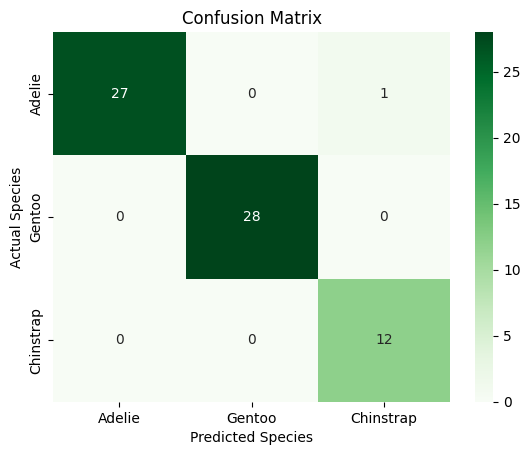

In [120]:
conf = confusion_matrix(Ytest, ytest_pred, labels = ['Adelie', 'Gentoo', 'Chinstrap'])

plt.figure()
sns.heatmap(conf, annot=True, xticklabels= ['Adelie', 'Gentoo', 'Chinstrap'], fmt="d", yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel("Actual Species")
plt.xlabel("Predicted Species")

In [121]:
# the correlation between sex and other column
correlation_matrix = new_penguins_standardize_drop_yr.iloc[:,1:].corr()

# the correlation of sex column with other columns
sex_correlation = correlation_matrix['sex'].drop('sex') 

print(sex_correlation)


bill_length_mm      -0.339069
bill_depth_mm       -0.373744
flipper_length_mm   -0.234742
body_mass_g         -0.414093
island_Biscoe       -0.008597
island_Dream        -0.011178
island_Torgersen     0.027202
Name: sex, dtype: float64


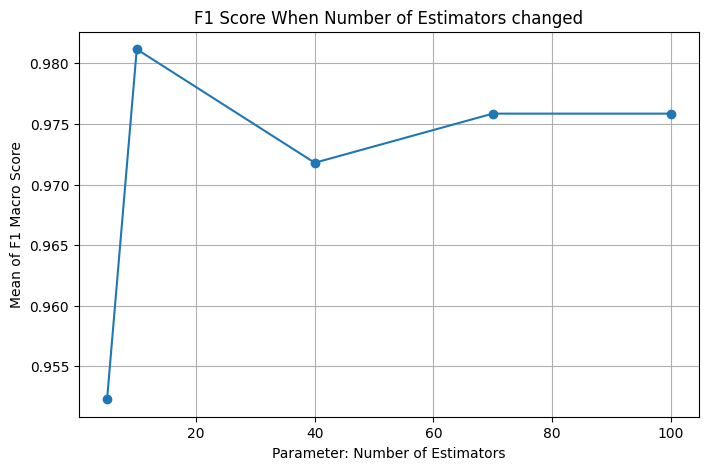

In [122]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(8,5))
plt.plot(filtered_by_bestpara['param_n_estimators'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Number of Estimators')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Number of Estimators changed')
plt.grid(True)
plt.show()

In [123]:
filtered_by_bestpara

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_min_weight_fraction_leaf,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
1020,0.006127,0.001227,0.002046,0.000518,gini,5,sqrt,1,2,0.1,...,0.957351,1.0,0.911111,0.971781,0.908918,0.962013,1.0,0.952286,0.033437,5041
1021,0.009273,0.000994,0.002575,0.001405,gini,5,sqrt,1,2,0.1,...,0.957351,1.0,0.911111,1.000000,1.000000,0.962013,1.0,0.981164,0.029758,1
1022,0.037321,0.003397,0.003947,0.000820,gini,5,sqrt,1,2,0.1,...,0.909524,1.0,0.874608,1.000000,1.000000,0.962013,1.0,0.971794,0.044959,2641
1023,0.062121,0.001665,0.004820,0.000644,gini,5,sqrt,1,2,0.1,...,0.909524,1.0,0.911111,1.000000,1.000000,0.962013,1.0,0.975850,0.036940,2161
1024,0.091127,0.004117,0.005666,0.000850,gini,5,sqrt,1,2,0.1,...,0.909524,1.0,0.911111,1.000000,1.000000,0.962013,1.0,0.975850,0.036940,2161


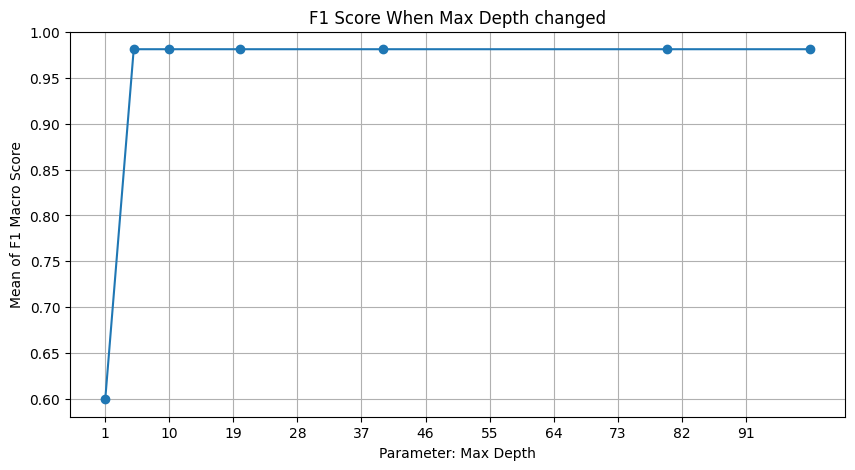

In [124]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(10,5))
plt.plot(filtered_by_bestpara['param_max_depth'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Max Depth')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Max Depth changed')
plt.grid(True)
plt.xticks(np.arange(1,100,9)) 

plt.show()


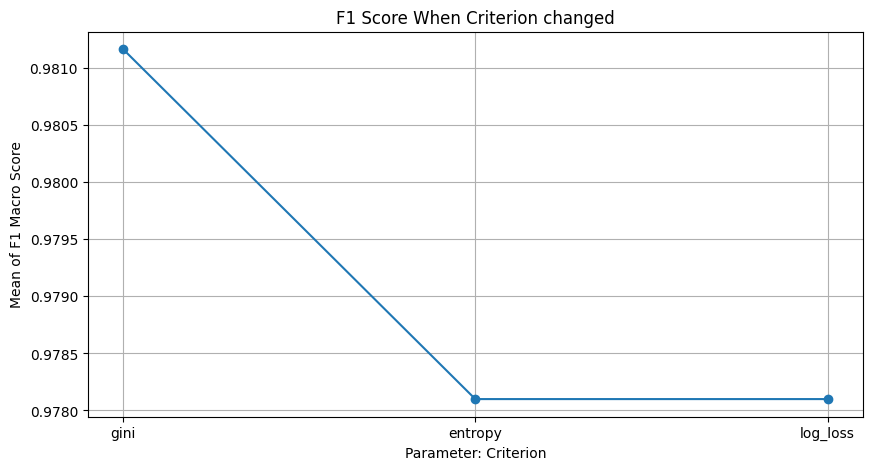

In [125]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'].isin(param_grid['criterion'])) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(10,5))
plt.plot(filtered_by_bestpara['param_criterion'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Criterion')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Criterion changed')
plt.grid(True)

plt.show()


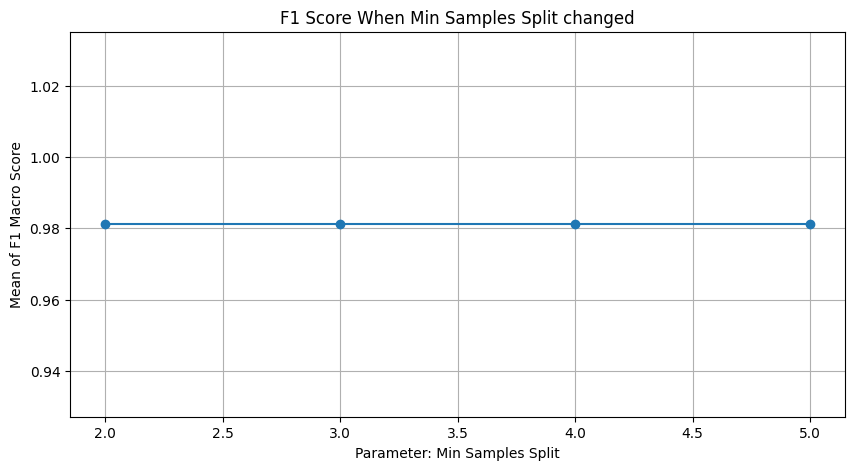

In [126]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(10,5))
plt.plot(filtered_by_bestpara['param_min_samples_split'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Min Samples Split')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Min Samples Split changed')
plt.grid(True)

plt.show()


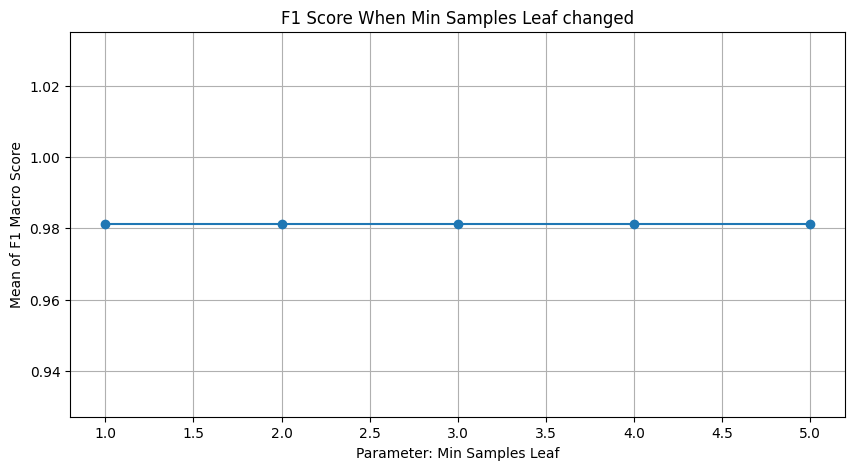

In [127]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(10,5))  
plt.plot(filtered_by_bestpara['param_min_samples_leaf'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Min Samples Leaf')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Min Samples Leaf changed')
plt.grid(True)

plt.show()


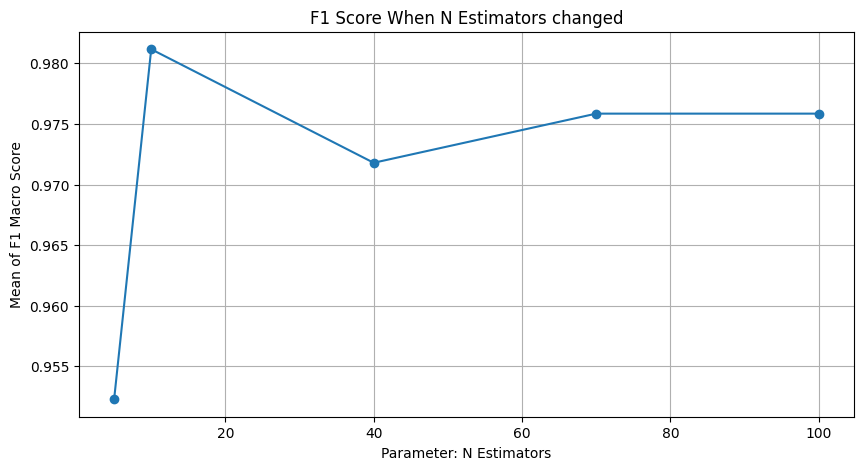

In [128]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(10,5))  
plt.plot(filtered_by_bestpara['param_n_estimators'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: N Estimators')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When N Estimators changed')
plt.grid(True)

plt.show()


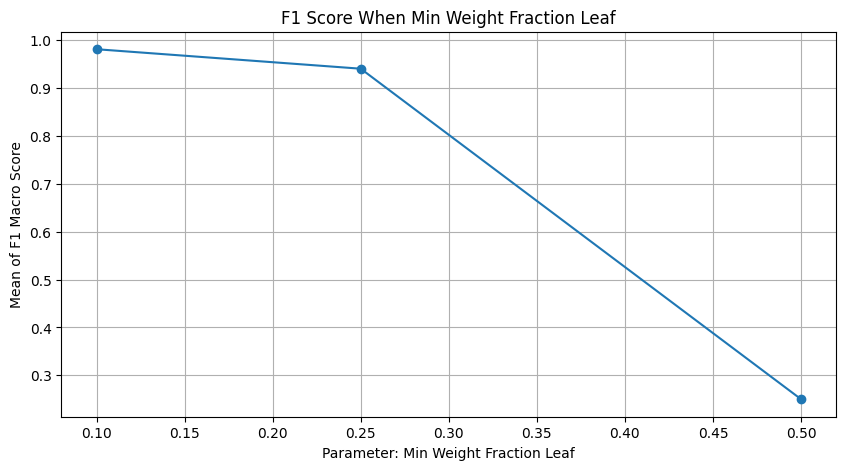

In [129]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators']) &
    (results_fromgrid['param_max_features'] == best_params['max_features'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(10,5))  
plt.plot(filtered_by_bestpara['param_min_weight_fraction_leaf'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Min Weight Fraction Leaf')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Min Weight Fraction Leaf')
plt.grid(True)

plt.show()


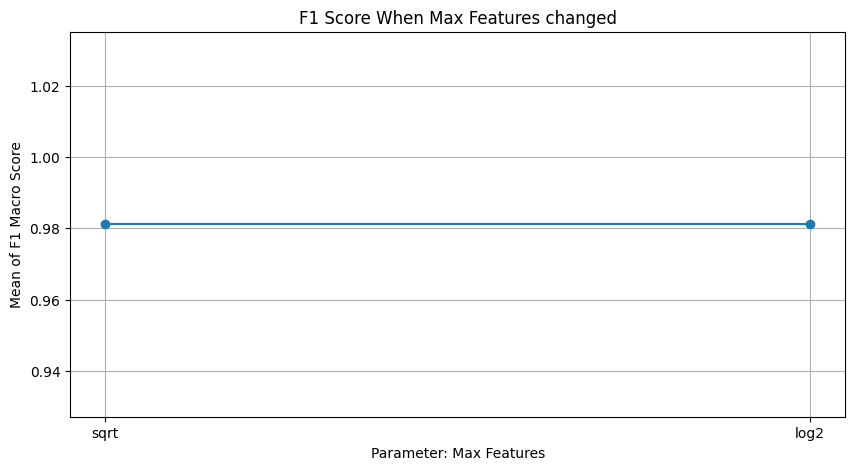

In [130]:
results_fromgrid = pd.DataFrame(grid_search.cv_results_)
# print(results_fromgrid)
# filter only values that I want to plot
filtered_by_bestpara = results_fromgrid[
    (results_fromgrid['param_criterion'] == best_params['criterion']) &
    (results_fromgrid['param_max_depth'] == best_params['max_depth']) &
    (results_fromgrid['param_min_samples_split'] == best_params['min_samples_split']) &
    (results_fromgrid['param_min_samples_leaf'] == best_params['min_samples_leaf']) &
    (results_fromgrid['param_min_weight_fraction_leaf'] == best_params['min_weight_fraction_leaf']) &
    (results_fromgrid['param_n_estimators'] == best_params['n_estimators'])
]

# print(filtered_by_bestpara)

plt.figure(figsize=(10,5))  
plt.plot(filtered_by_bestpara['param_max_features'], filtered_by_bestpara['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Parameter: Max Features')
plt.ylabel('Mean of F1 Macro Score')
plt.title('F1 Score When Max Features changed')
plt.grid(True)

plt.show()


# I will not cut sex

# T-test

In [131]:
# T-test
X = new_penguins_standardize_drop_yr.drop(columns=['species'])
y = new_penguins_standardize_drop_yr['species']

cv = StratifiedKFold(n_splits=10, random_state=15, shuffle=True) 
Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, random_state=15, test_size=0.2)

f1scores_basedline = []
f1scores_random = []
f1scores_knn = []


for train_index, test_index in cv.split(X, y):
    Xtr, Xtest = X.iloc[train_index], X.iloc[test_index]
    Ytr, Ytest = y.iloc[train_index], y.iloc[test_index]
    
    modelknn = knn_tune_best.fit(Xtr, Ytr)
    modeldumm = dummy_clf.fit(Xtr, Ytr)
    modelrandom = rforest_best.fit(Xtr, Ytr)
    
    Ypredknn = modelknn.predict(Xtest)
    Ypreddumm = modeldumm.predict(Xtest)
    Ypredrandom = modelrandom.predict(Xtest)
    
    f1scores_knn.append(f1_score(Ytest, Ypredknn, average='macro'))
    f1scores_basedline.append(f1_score(Ytest, Ypreddumm, average='macro'))
    f1scores_random.append(f1_score(Ytest, Ypredrandom, average='macro'))

# test
f1scores_knn

[0.9628647214854111,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9662835249042145,
 1.0,
 1.0,
 1.0]

In [132]:
print(f"knn: mean={np.mean(f1scores_knn):.4f}, std={np.std(f1scores_knn):.4f}")
print(f"randomforest: mean={np.mean(f1scores_random):.4f}, std={np.std(f1scores_random):.4f}")
print(f"basedline: mean={np.mean(f1scores_basedline):.4f}, std={np.std(f1scores_basedline):.4f}")

knn: mean=0.9929, std=0.0142
randomforest: mean=0.9764, std=0.0372
basedline: mean=0.2044, std=0.0026


In [133]:
tstat_knn_random, pval_knn_random = ttest_rel(f1scores_knn, f1scores_random)
tstat_knn_baseline, pval_knn_baseline = ttest_rel(f1scores_knn, f1scores_basedline)
tstat_random_baseline, pval_random_baseline = ttest_rel(f1scores_random, f1scores_basedline)

print(f"KNN vs Random Forest: t-statistic={tstat_knn_random:.2f}, p-value={pval_knn_random:.3f}")
print(f"KNN vs Baseline: t-statistic={tstat_knn_baseline:.2f}, p-value={pval_knn_baseline:.3f}")
print(f"Random Forest vs Baseline: t-statistic={tstat_random_baseline:.2f}, p-value={pval_random_baseline:.3f}")


KNN vs Random Forest: t-statistic=1.31, p-value=0.222
KNN vs Baseline: t-statistic=165.76, p-value=0.000
Random Forest vs Baseline: t-statistic=61.07, p-value=0.000


- KNN vs Random Forest: p-value = 0.222 > 0.05 outcome of the paired t-test shows that I cannot reject the hypothesis. The performance of the models is no significantly different performance between KNN vs Random Forest
- KNN vs Baseline: p-value = 0.000 < 0.05 outcome of the paired t-test shows that the performance of the models are significantly different performance
- Random Forest vs Baseline: p-value =0 .000 < 0.05 outcome of the paired t-test shows that the performance of the models are significantly different performance


# Unsupervised Learing

In [134]:
new_penguins['year'].unique()

array([2007, 2008, 2009])

In [135]:
df = new_penguins.drop(columns = ['year'])
df_b = new_penguins.drop(columns = ['year'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,male
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,female
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,female
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,male
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,female
...,...,...,...,...,...,...,...
332,Chinstrap,Dream,55.80000,19.80000,207.0,4000.0,male
333,Chinstrap,Dream,43.50000,18.10000,202.0,3400.0,female
334,Chinstrap,Dream,49.60000,18.20000,193.0,3775.0,male
335,Chinstrap,Dream,50.80000,19.00000,210.0,4100.0,male


In [136]:
# X = new_penguins.drop(columns = ['species', 'year'])
# X['sex'] = X['sex'].map({'male':0, 'female':1})
# X = pd.get_dummies(X, columns=['island'], prefix='island')
# X

In [137]:
X_t = new_penguins_standardize.drop(columns = ['species', 'year'])
X_t.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,-0.881442,0.804500,-1.427484,-0.569959,0,False,False,True
1,-0.807275,0.141310,-1.068751,-0.506942,1,False,False,True
2,-0.658939,0.447398,-0.423029,-1.200131,1,False,False,True
3,0.012637,0.014370,-0.279536,-0.191856,0,False,False,True
4,-1.326449,1.110587,-0.566523,-0.948062,1,False,False,True


In [138]:
X_t.columns


Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'island_Biscoe', 'island_Dream', 'island_Torgersen'],
      dtype='object')

In [139]:
cols = [['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'island_Biscoe', 'island_Dream', 'island_Torgersen']]

In [140]:
pca = PCA(n_components=X_t.shape[1])
# pca = PCA(n_components=2)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=8) = [2.96360330e+00 9.45538945e-01 4.81262677e-01 1.55710548e-01
 1.44424788e-01 1.11597065e-01 6.94714046e-02 2.05839694e-32]
explained_variance_ratio (n_components=8) = [6.08341816e-01 1.94091726e-01 9.87892714e-02 3.19628599e-02
 2.96462208e-02 2.29076412e-02 1.42604647e-02 4.22529200e-33]
sum explained_variance_ratio = 0.9999999999999999


In [141]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    X_t

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.xlabel('# of components', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.ylabel('proportion of variance explained', fontdict={'family': 'Times New Roman', 'size': 16})
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=15)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=15)
                        

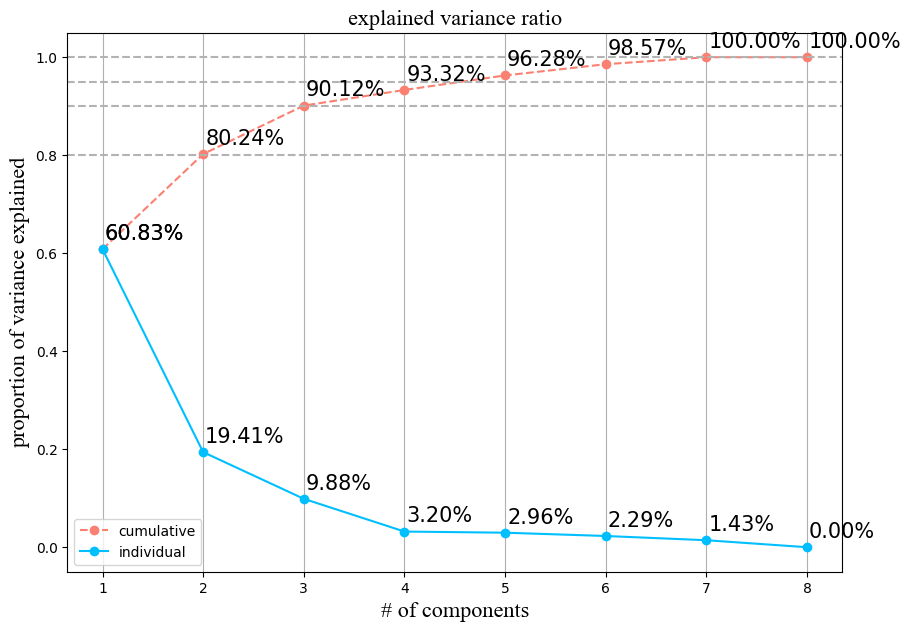

In [142]:
scree_plot(X_t, 8, True, True)

In [143]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4)
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

Styler.applymap has been deprecated. Use Styler.map instead.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
bill_length_mm,0.420900,0.555300,0.574500,-0.369800,0.187800,-0.095000,0.058700,0.000000
bill_depth_mm,-0.402100,0.674700,-0.381700,-0.064900,0.052400,0.386600,0.284700,0.000000
flipper_length_mm,0.555400,0.034600,-0.120100,0.061600,-0.466900,0.636100,-0.222300,-0.000000
body_mass_g,0.533700,0.116700,-0.451400,0.260500,-0.017100,-0.419200,0.503900,-0.000000
sex,-0.063700,-0.359100,0.348100,-0.096700,-0.128300,0.329400,0.782000,0.000000
island_Biscoe,0.204000,-0.195200,-0.167700,-0.055300,0.682200,0.300000,-0.019700,0.577400
island_Dream,-0.128400,0.230800,0.351100,0.649500,-0.220300,-0.056200,0.007100,0.577400
island_Torgersen,-0.075500,-0.035600,-0.183400,-0.594200,-0.461900,-0.243900,0.012600,0.577400


In [144]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=2) = [2.9636033  0.94553895]
explained_variance_ratio (n_components=2) = [0.60834182 0.19409173]
sum explained_variance_ratio = 0.802433541924859


In [145]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              df[['species']]], axis = 'columns')
dd.head()

,PC1,PC2,species
0,-1.876839,0.101394,Adelie
1,-1.409809,-0.644199,Adelie
2,-1.481776,-0.413870,Adelie
3,-0.343476,0.148616,Adelie
4,-1.974521,-0.312692,Adelie


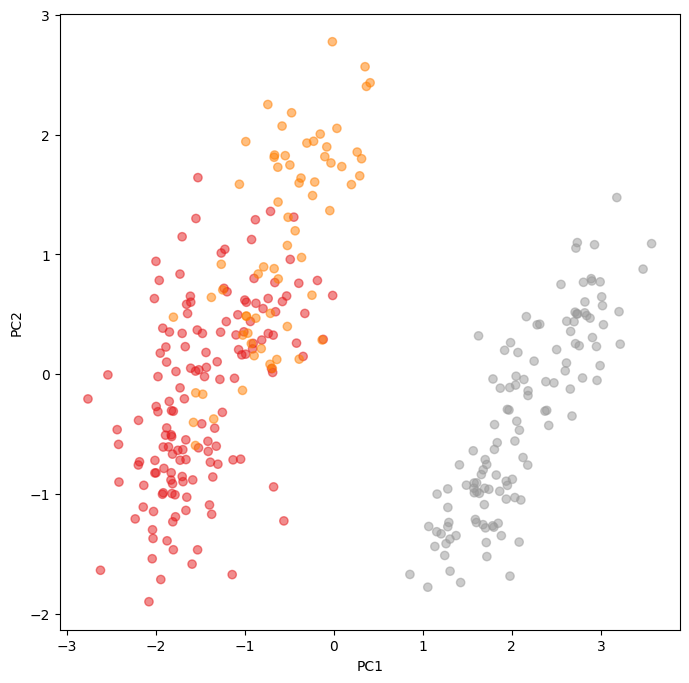

In [146]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=df.species.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

## biplot using yellowbrick package

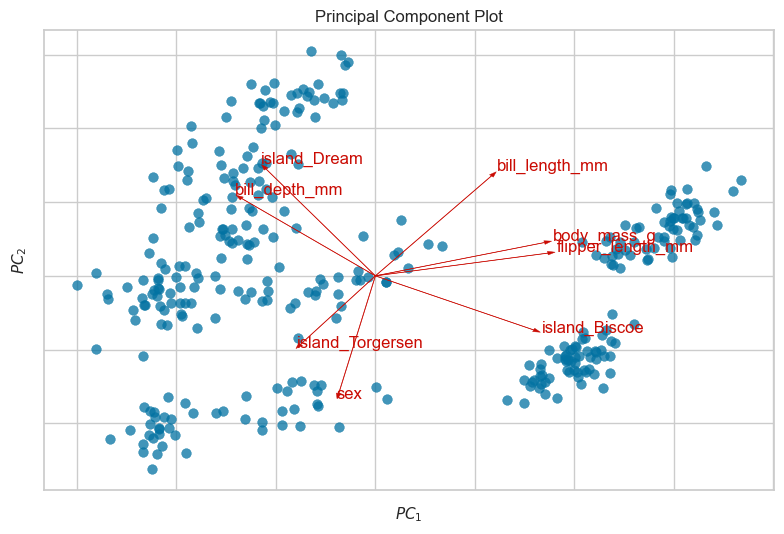

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [147]:
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [148]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

Styler.applymap has been deprecated. Use Styler.map instead.


,PC1,PC2
bill_length_mm,0.420900,0.555300
bill_depth_mm,-0.402100,0.674700
flipper_length_mm,0.555400,0.034600
body_mass_g,0.533700,0.116700
sex,-0.063700,-0.359100
island_Biscoe,0.204000,-0.195200
island_Dream,-0.128400,0.230800
island_Torgersen,-0.075500,-0.035600


### Plot 3D (PC1, PC2, PC3)

In [149]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [2.9636033  0.94553895 0.48126268]
explained_variance_ratio (n_components=3) = [0.60834182 0.19409173 0.09878927]
sum explained_variance_ratio = 0.9012228132811162


In [150]:
X_pca

array([[-1.87683935,  0.1013938 , -0.76250382],
       [-1.40980914, -0.64419881, -0.19023095],
       [-1.481776  , -0.4138703 ,  0.01346275],
       ...,
       [-0.51282003,  1.3103411 ,  0.87009238],
       [ 0.31278398,  1.79917383,  0.51072765],
       [-0.43302874,  1.19750844,  1.14160604]])

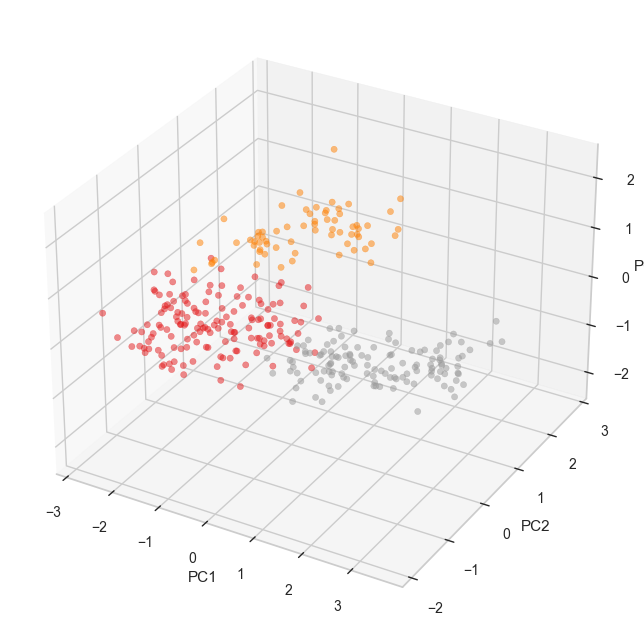

In [151]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=df.species.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

In [152]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

Styler.applymap has been deprecated. Use Styler.map instead.


,PC1,PC2,PC3
bill_length_mm,0.420900,0.555300,0.574500
bill_depth_mm,-0.402100,0.674700,-0.381700
flipper_length_mm,0.555400,0.034600,-0.120100
body_mass_g,0.533700,0.116700,-0.451400
sex,-0.063700,-0.359100,0.348100
island_Biscoe,0.204000,-0.195200,-0.167700
island_Dream,-0.128400,0.230800,0.351100
island_Torgersen,-0.075500,-0.035600,-0.183400


## GaussianMixture

In [153]:
from sklearn.mixture import GaussianMixture

In [154]:
# parameter
n_components_range = range(1,5)
covariance_types = ['full', 'tied', 'diag', 'spherical']
tol_list = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-15, 1e-20, 1e-30]
max_iter_list = [50, 200, 400, 1000, 2000]
reg_covar_list = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-15, 1e-20, 1e-30]

def tune_gmm(X, n_components_range, covariance_types, tol_list, max_iter_list, reg_covar_list):
    lowest_bic = np.infty
    best_gmm = None
    best_params = None
    
    for n_components in n_components_range:
        for covariance_type in covariance_types:
            for tol in tol_list:
                for max_iter in max_iter_list:
                    for reg_covar in reg_covar_list:
                        gmm = GaussianMixture(n_components=n_components, 
                                            covariance_type=covariance_type,
                                            tol=tol, 
                                            max_iter=max_iter, 
                                            random_state=15)
                        gmm.fit(X)
                        bic = gmm.bic(X)
                        
                        if bic < lowest_bic:
                            lowest_bic = bic
                            best_gmm = gmm
                            best_params = {
                                'n_components': n_components, 
                                'covariance_type': covariance_type,
                                'tol': tol, 
                                'max_iter': max_iter,
                                'reg_covar': reg_covar
                            }
        
    return best_gmm, best_params

best_gmm, best_params = tune_gmm(X_pca, n_components_range, covariance_types, tol_list, max_iter_list, reg_covar_list)

print(f"Best BIC: {best_gmm.bic(X_pca)}")
print(f"Best parameters: {best_params}")


Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
Initialization 1 did not

Best BIC: 2281.6474803022575
Best parameters: {'n_components': 4, 'covariance_type': 'tied', 'tol': 1e-15, 'max_iter': 200, 'reg_covar': 0.001}


In [155]:
best_gm = GaussianMixture(n_components=4, covariance_type='tied', tol=1e-15, max_iter=200, random_state=15, reg_covar=0.001)
best_gm.fit(X_pca)


GaussianMixture(covariance_type='tied', max_iter=200, n_components=4,
                random_state=15, reg_covar=0.001, tol=1e-15)

In [156]:
cluster_lb = best_gm.predict(X_pca)
cluster_lb

array([3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [157]:
from sklearn.metrics import silhouette_score

# silhouette coefficient of GMM
gmm_silhouette = silhouette_score(X_pca, best_gmm.predict(X_pca))

print(f"GMM silhouette Coefficient: {gmm_silhouette:.4f}")

GMM silhouette Coefficient: 0.3803


In [158]:
# %matplotlib qt
# %pylab qt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


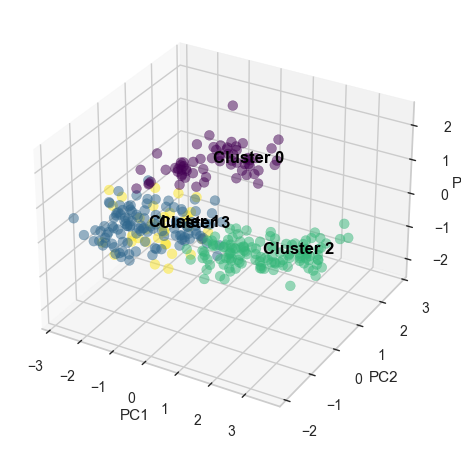

In [159]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# identify cluster color
colors = plt.cm.tab10(cluster_lb / 10.)

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=50, alpha=0.5, c=cluster_lb, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

legend = ax.legend(loc='upper left', framealpha=1)  # framealpha makes the legend background opaque

for i in np.unique(cluster_lb):

    center = X_pca[cluster_lb == i].mean(axis=0)
    ax.text(center[0], center[1], center[2], f'Cluster {i}', color='black', weight='bold')


plt.show()

In [160]:
df['cluster'] = cluster_lb

# compare cluster 1 and 3
cluster_1 = df[df['cluster'] == 1]  
cluster_3 = df[df['cluster'] == 3]  

# check number of sen in Cluster 1 and 3
sex_species_cluster_1 = pd.crosstab(cluster_1['species'], cluster_1['sex'])
print("Cluster 1- Sex and Species:")
print(sex_species_cluster_1)

sex_species_cluster_3 = pd.crosstab(cluster_3['species'], cluster_3['sex'])
print("\nCluster 3 - Sex and Species:")
print(sex_species_cluster_3)

Cluster 1- Sex and Species:
sex      female  male
species              
Adelie       68    47

Cluster 3 - Sex and Species:
sex      female  male
species              
Adelie        8    26


In [161]:
cluster_2 = df[df['cluster'] == 2]  
cluster_0 = df[df['cluster'] == 0]  

sex_species_cluster_2 = pd.crosstab(cluster_2['species'], cluster_2['sex'])
print("Cluster 2- Sex and Species:")
print(sex_species_cluster_2)

sex_species_cluster_0 = pd.crosstab(cluster_0['species'], cluster_0['sex'])
print("\nCluster 0 - Sex and Species:")
print(sex_species_cluster_0)

Cluster 2- Sex and Species:
sex      female  male
species              
Gentoo       62    60

Cluster 0 - Sex and Species:
sex        female  male
species                
Chinstrap      33    33


At first, I thought that yellow and blue clusters were differentiated by sex. However, after creating crosstab, it shown that both females and males were present in both groups, so I reject the assumption that group yellow and blue represent the same species but different groups. However, I know that only Adelie are found in these two group.

Cluster 1 might contain Adelie with similar physical feature, such as bill_length_mm, flipper_length_mm, etc., which indicate a closeness between individual in this group. Moreover, this group has more females than males, which tells the scatter between sex.

Cluster 3, the number of males is clearly higher than females, which might indicate the specific features that are dominant in males.  

# baseline 
In this clustering task, I will use K-mean clustering as the baseline model. However, I will first find the optimal K value.

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

Text(0.5, 1.0, 'The elbow method showing the optimal k')

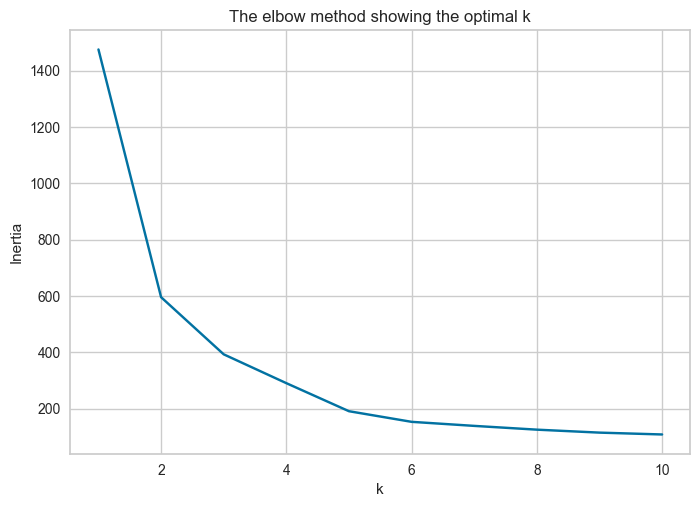

In [162]:
k = 10
inertias = []
for k in range(1,k+1):
    kmm = KMeans(n_clusters=k, random_state=15)
    kmm.fit(X_pca)
    inertias.append(kmm.inertia_)


plt.figure()
plt.plot(range(1, k+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

In [163]:
# compare between 2 can 3
kmeans_model = KMeans(n_clusters=3, random_state=15)
kmeans_model.fit(X_pca)
cluster_labels = kmeans_model.predict(X_pca)

print(f"Kmean Silhouette Scores: {silhouette_score(X_pca, cluster_labels)}")

Kmean Silhouette Scores: 0.4864413178744105


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [164]:
# compare between 2 can 3
kmeans_model = KMeans(n_clusters=2, random_state=15)
kmeans_model.fit(X_pca)
cluster_labels = kmeans_model.predict(X_pca)
silhouette_baseline = silhouette_score(X_pca, cluster_labels)
print(f"Kmean Silhouette Scores: {silhouette_baseline}")

Kmean Silhouette Scores: 0.5490863171452993


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


The Silhouette Scores when k = 2 is higher than 3, so i will use k=2 to model the data

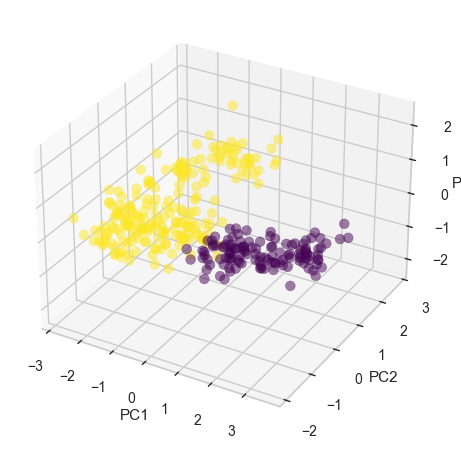

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# identify cluster color
colors = plt.cm.tab10(cluster_lb / 10.)

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=50, alpha=0.5, c=cluster_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [166]:
df_b['cluster'] = cluster_labels
cluster_0 = df_b[df_b['cluster'] == 0]  
cluster_1 = df_b[df_b['cluster'] == 1]  

sex_species_cluster_0 = pd.crosstab(cluster_0['species'], cluster_0['sex'])
print("Cluster 0- Sex and Species:")
print(sex_species_cluster_0)

sex_species_cluster_1 = pd.crosstab(cluster_1['species'], cluster_1['sex'])
print("\nCluster 1 - Sex and Species:")
print(sex_species_cluster_1)

Cluster 0- Sex and Species:
sex      female  male
species              
Gentoo       62    60

Cluster 1 - Sex and Species:
sex        female  male
species                
Adelie         76    73
Chinstrap      33    33


## T-test to compare performance between baseline model (Kmean clustering) and GMM

In [167]:
cv = KFold(n_splits=10, random_state=15, shuffle=True) 
scoresbl=[]
scoresgmm=[]
for train_index, test_index in cv.split(X_pca):
    Xtr, Xtest = X_pca[train_index], X_pca[test_index]
    modelgmm=best_gmm.fit(X_pca)
    modelbl=kmeans_model.fit(X_pca)
    
    cluster_lb_gmm = best_gm.predict(X_pca)
    cluster_label_bl = kmeans_model.predict(X_pca)
    
    gmm_silhouette = silhouette_score(X_pca, best_gmm.predict(X_pca))
    silhouette_baseline = silhouette_score(X_pca, cluster_labels)
    
    
    scoresgmm.append(gmm_silhouette)
    scoresbl.append(silhouette_baseline)



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

In [168]:
from scipy import stats

In [169]:
# t-test
tstat_bl_gmm, pval_bl_gmm = stats.ttest_rel(scoresbl, scoresgmm)

print(f"GMM vs Baseline: t-statistic={tstat_bl_gmm.mean():.2f}, p-value={pval_bl_gmm.mean():.3f}")

if pval_bl_gmm.mean() < 0.05:
    print("Outcome of the paired t-test shows that the performance of the models are significantly different.")
else:
    print("Outcome of the paired t-test shows that I cannot reject the hypothesis. The performance of the models is not significantly different.")


GMM vs Baseline: t-statistic=inf, p-value=0.000
Outcome of the paired t-test shows that the performance of the models are significantly different.


Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


The resulte shows that Kmean or my baseline model is significant higher than GMM